<div style="background-color: #6EC1E4; color: white; padding: 20px; text-align: center; border-radius: 10px;">
    <div style="font-size: 36px; margin-bottom: 10px; font-weight: bold;">Predict Chronic Kidney Disease During ICU Stay</div>
    <h1 style="font-size: 28px; margin-top: 5px;">Machine Learning in Medicine - MIMIC III Data</h1>
</div>


#### Names of participants :
#### Liraz Sitruk - 316492925
#### Chen (Hana) Abitbul Mustaki - 209207067
#### Netanel Farhi - 318590890 

<h1>Part 1 - EDA</h1>


<h4 id="installing-importing-necessary-libraries">1.1 Installing & Importing Necessary Libraries</h4>
<p>First, we will import the necessary libraries that we will use throughout our data preprocessing and analysis:</p>
<ul>
    <li><strong>Data Manipulation:</strong> <code>pandas</code> and <code>numpy</code> for efficient data handling and manipulation.</li>
    <li><strong>Visualization:</strong> <code>matplotlib</code> and <code>seaborn</code> for creating insightful plots and visualizations.</li>
    <li><strong>Statistical Analysis:</strong> <code>scipy.stats</code> and <code>lifelines</code> for conducting statistical tests and survival analysis.</li>
    <li><strong>Machine Learning Models:</strong> <code>sklearn</code> for implementing various machine learning algorithms such as logistic regression, random forests, gradient boosting, and support vector machines.</li>
    <li><strong>Model Evaluation:</strong> Metrics from <code>sklearn.metrics</code> to evaluate model performance, including accuracy, precision, recall, F1 score, ROC-AUC, and others.</li>
    <li><strong>Preprocessing:</strong> <code>sklearn.preprocessing</code> for scaling and encoding data, and <code>imblearn</code> for handling class imbalance through oversampling and undersampling techniques.</li>
    <li><strong>Feature Selection:</strong> <code>sklearn.feature_selection</code> for selecting important features using methods like SelectKBest and Recursive Feature Elimination (RFE).</li>
    <li><strong>Display and HTML:</strong> <code>IPython.display</code> for enhanced notebook display capabilities.</li>
</ul>
<p>Below are the imports used in this project:</p>


In [1]:

# Uncomment the below lines to install packages if needed
# !pip install --upgrade scikit-learn
# !pip install --upgrade imbalanced-learn
# !pip install lifelines

# Data Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Analysis
from scipy.stats import chisquare
import scipy.stats as stats
from lifelines import KaplanMeierFitter

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, precision_recall_curve

# Display Tools
from IPython.display import display
import math
from IPython.display import display, HTML

<h4 id="loading-dataset">2.1 Loading Dataset</h4>
<p>Next, we load the CKD dataset which contains various features related to patients' health and their CKD status. We will use this dataset for further analysis and model training.</p>


In [2]:
df = pd.read_excel('CKD dataset.xlsx')

<h4 id="checking-missing-values-and-data-types">2.2 Checking Missing Values and Data Types</h4>
<p>We check for missing values and data types to understand the structure of our dataset and identify any data cleaning needs.</p>


In [3]:
# Check for missing values and data types
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df) * 100).round(0).astype(int)  # Convert to integer to remove decimal point
data_types = df.dtypes

# Create a DataFrame for the summary
summary_df = pd.DataFrame({
    'Data Type': data_types
})

# Define CSS styles using a single pastel color
styles = [
    dict(selector="thead", props=[("background-color", "#daeaf6"), ("color", "black"), ("padding", "8px")]),  # Pastel Blue
    dict(selector="tbody tr:nth-child(even)", props=[("background-color", "#daeaf6"), ("padding", "8px")]),  # Pastel Blue
    dict(selector="tbody tr:nth-child(odd)", props=[("background-color", "#daeaf6"), ("padding", "8px")]),  # Pastel Blue
    dict(selector="td, th", props=[("border", "1px solid #D3D3D3"), ("text-align", "center"), ("padding", "8px")]),  # Light Gray Border
    dict(selector="table", props=[("border-collapse", "collapse"), ("width", "100%")])
]

# Style the DataFrame
summary_df_styled = summary_df.style.set_table_styles(styles)

# Display the styled DataFrame
display(summary_df_styled)

,Data Type
StudyID,int64
Gender,int64
AgeBaseline,int64
Age.3.categories,int64
HistoryDiabetes,int64
HistoryCHD,int64
HistoryVascular,int64
HistorySmoking,int64
HistoryHTN,int64
HistoryDLD,int64


In [4]:
# Check for missing values and data types
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df) * 100).round(0).astype(int)  # Convert to integer to remove decimal point
data_types = df.dtypes

# Create a DataFrame for the summary
summary_df = pd.DataFrame({
    'Data Type': data_types,
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

# Filter the summary DataFrame to include only features with missing values
missing_values_df = summary_df[summary_df['Missing Values'] > 0]

# Define CSS styles using a single pastel color
styles = [
    dict(selector="thead", props=[("background-color", "#daeaf6"), ("color", "black"), ("padding", "8px")]),  # Pastel Blue
    dict(selector="tbody tr:nth-child(even)", props=[("background-color", "#daeaf6"), ("padding", "8px")]),  # Pastel Blue
    dict(selector="tbody tr:nth-child(odd)", props=[("background-color", "#daeaf6"), ("padding", "8px")]),  # Pastel Blue
    dict(selector="td, th", props=[("border", "1px solid #D3D3D3"), ("text-align", "center"), ("padding", "8px")]),  # Light Gray Border
    dict(selector="table", props=[("border-collapse", "collapse"), ("width", "100%")])
]

# Style the DataFrame
missing_values_df_styled = missing_values_df.style.set_table_styles(styles)

# Display the styled DataFrame
display(missing_values_df_styled)


,Data Type,Missing Values,Missing Percentage (%)
TriglyceridesBaseline,float64,6,1
HgbA1C,float64,15,3


<h4 id="data-cleaning-and-transformation">2.3 Data Cleaning and Transformation</h4>
<p>We will clean and transform the data by handling extra spaces and special characters in column names and filtering the necessary columns for analysis.</p>


In [5]:
df.columns

Index(['StudyID', 'Gender', 'AgeBaseline', 'Age.3.categories',
       'HistoryDiabetes', 'HistoryCHD', 'HistoryVascular', 'HistorySmoking',
       'HistoryHTN ', 'HistoryDLD', 'HistoryObesity', 'DLDmeds', 'DMmeds',
       'HTNmeds', 'ACEIARB', 'CholesterolBaseline', 'TriglyceridesBaseline',
       'HgbA1C', 'CreatnineBaseline', 'eGFRBaseline', 'sBPBaseline',
       'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths', 'EventCKD35'],
      dtype='object')

In [6]:
# טיפול בעמודות שיש רווח מיותר בשם של העמודה
df.columns = df.columns.str.replace(' ', '').str.replace('[()]', '', regex=True)

C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\951576294.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_filtered[col], ax=axes[2 * i + 1], palette=palette, width=0.3)
C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\951576294.py:35: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.boxplot(y=df_filtered[col], ax=axes[2 * i + 1], palette=palette, width=0.3)
C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\951576294.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_filtered[col], ax=axes[2 * i + 1], palette=palette, width=0.3)
C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\951576294.py:35: UserWarning: The palette 

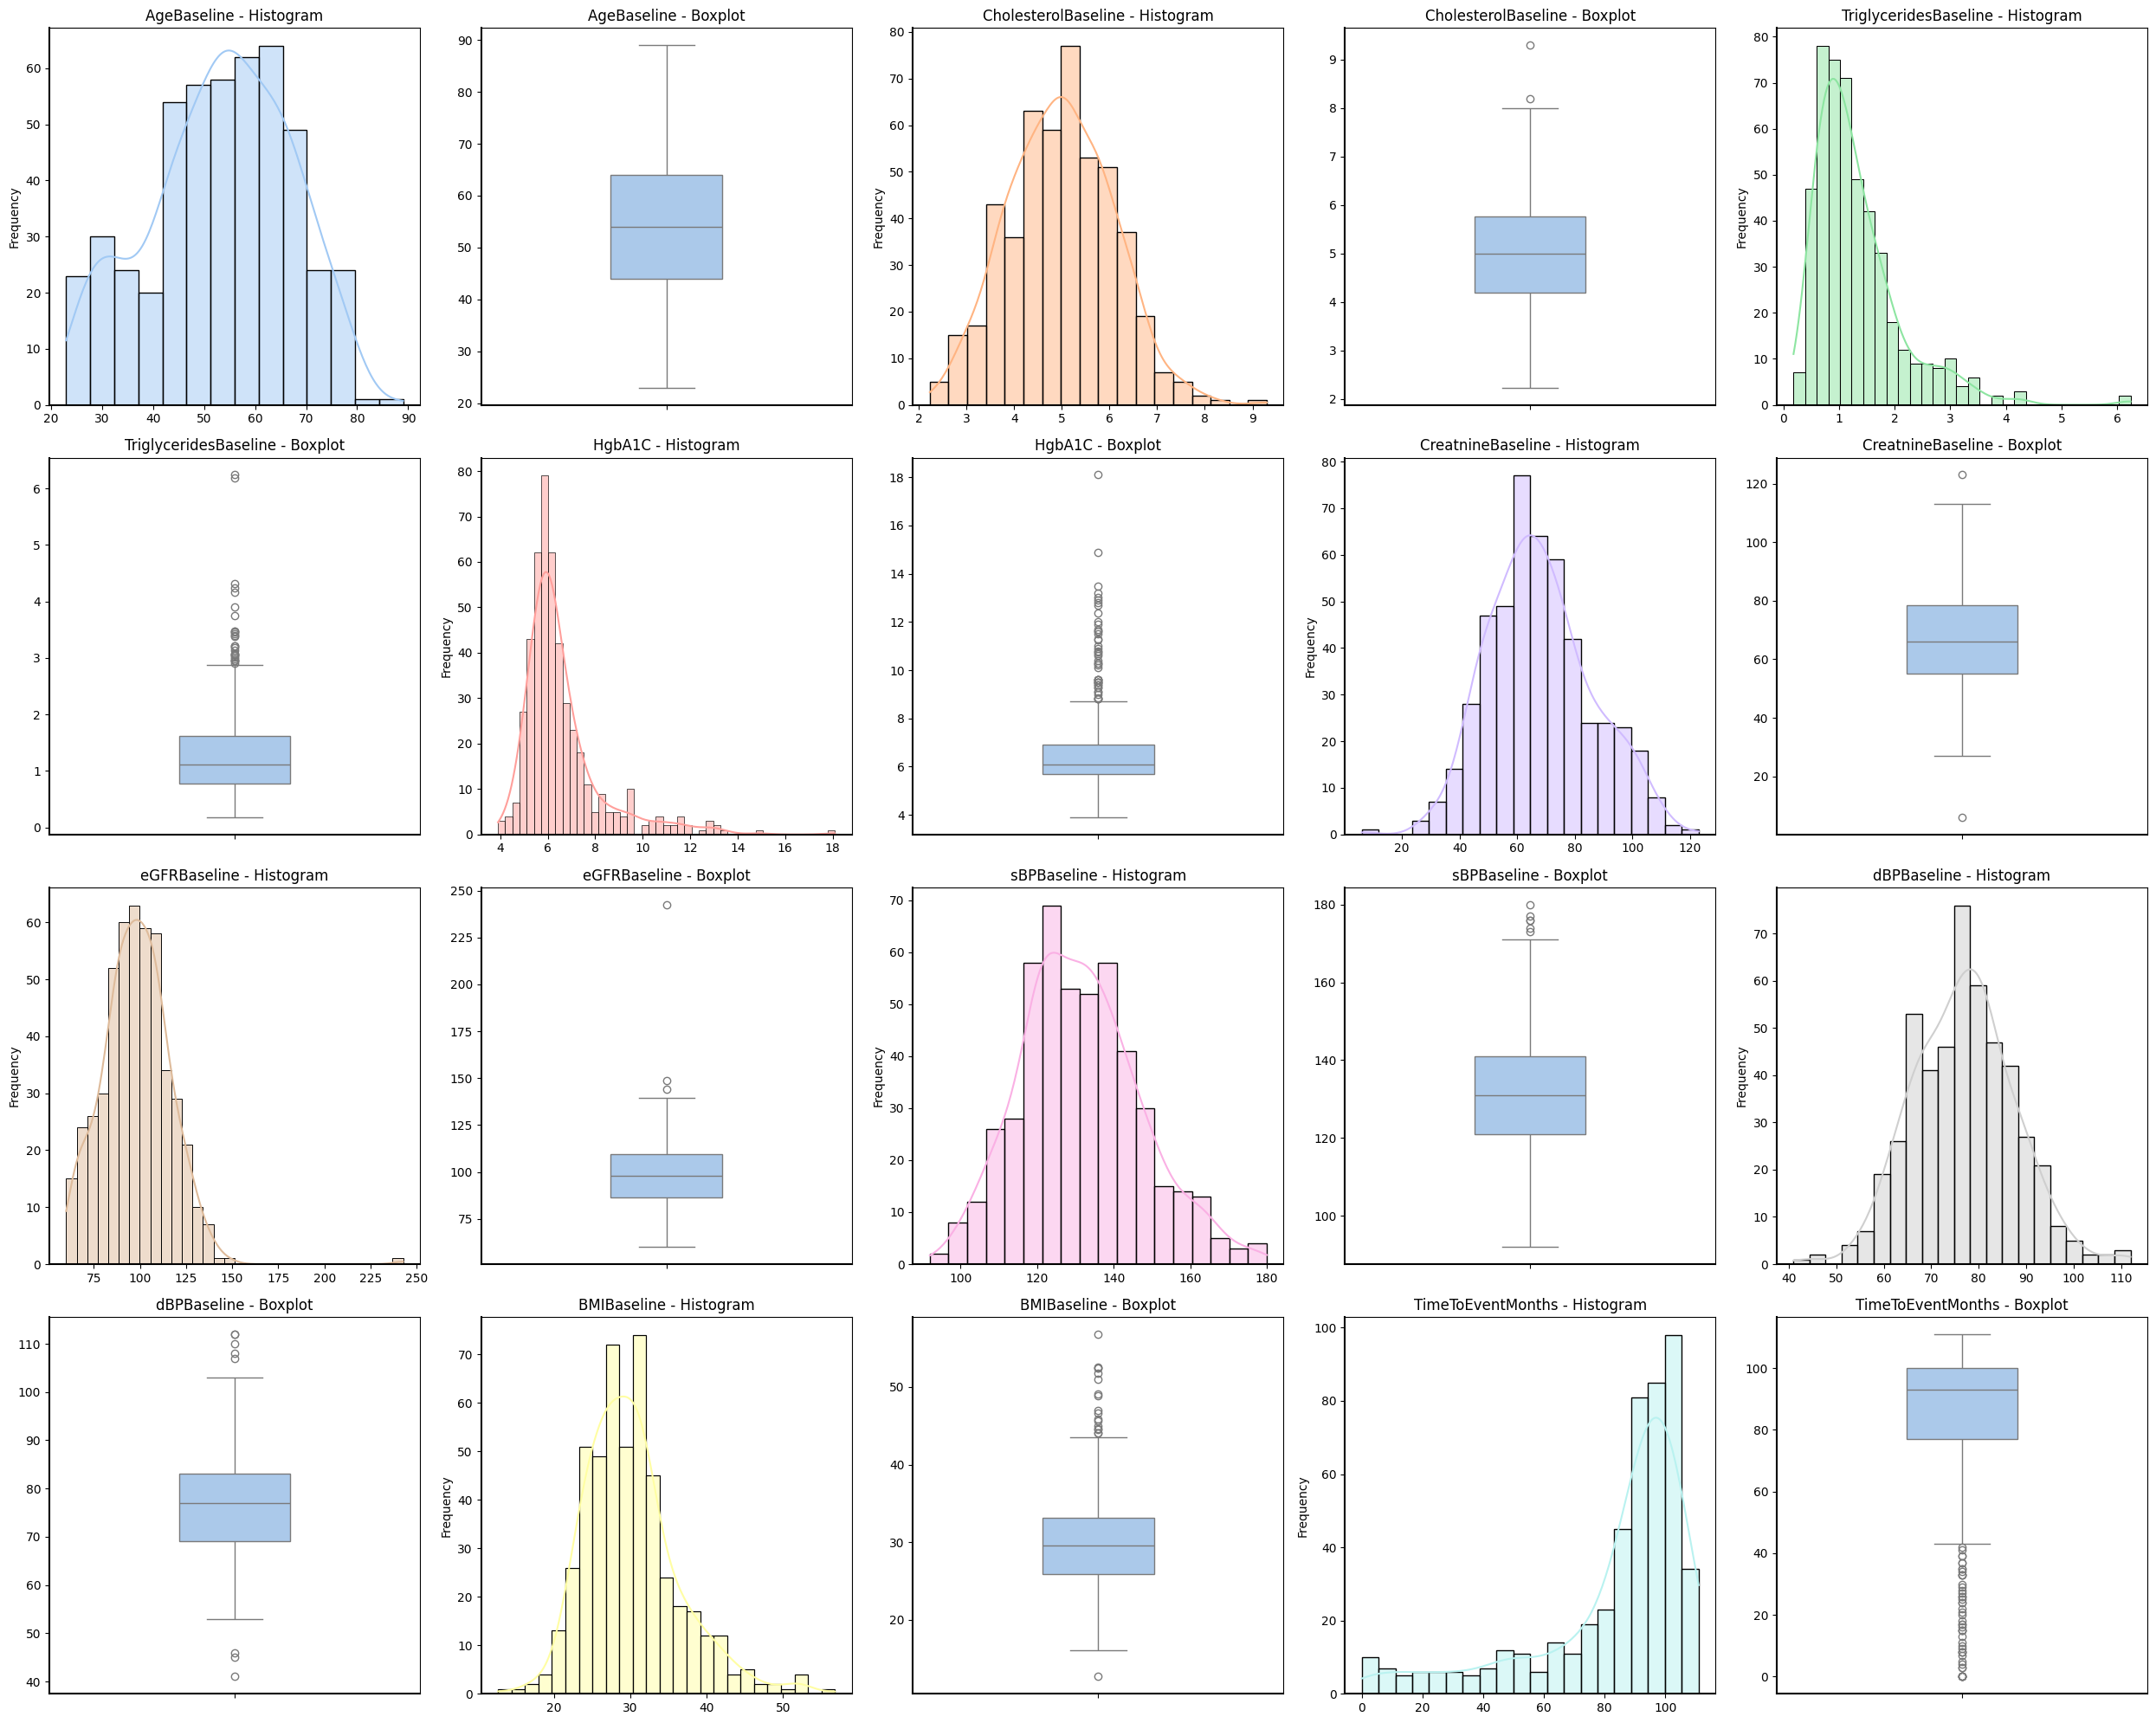

In [7]:
columns_to_plot = [
    'AgeBaseline', 'CholesterolBaseline', 'TriglyceridesBaseline', 'HgbA1C', 
    'CreatnineBaseline', 'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths'
]

# Select only the specified columns from the dataframe
df_filtered = df[columns_to_plot]

# Number of columns to plot
num_cols = len(columns_to_plot)

# Number of rows needed (5 plots per row, 2 rows for each feature: histogram and boxplot)
num_rows = math.ceil(num_cols * 2 / 5)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(25, 5 * num_rows), sharex=False)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a pastel color palette
palette = sns.color_palette("pastel")

# Plot each numeric column as a separate histogram and boxplot
for i, col in enumerate(columns_to_plot):
    sns.histplot(df_filtered[col].dropna(), kde=True, color=palette[i % len(palette)], ax=axes[2 * i])
    axes[2 * i].set_title(f'{col} - Histogram')
    axes[2 * i].set_xlabel('')
    axes[2 * i].set_ylabel('Frequency')
    axes[2 * i].spines['top'].set_visible(True)
    axes[2 * i].spines['right'].set_visible(True)
    axes[2 * i].spines['bottom'].set_linewidth(1.5)
    axes[2 * i].spines['left'].set_linewidth(1.5)
    
    sns.boxplot(y=df_filtered[col], ax=axes[2 * i + 1], palette=palette, width=0.3)
    axes[2 * i + 1].set_title(f'{col} - Boxplot')
    axes[2 * i + 1].set_xlabel('')
    axes[2 * i + 1].set_ylabel('')
    axes[2 * i + 1].spines['top'].set_visible(True)
    axes[2 * i + 1].spines['right'].set_visible(True)
    axes[2 * i + 1].spines['bottom'].set_linewidth(1.5)
    axes[2 * i + 1].spines['left'].set_linewidth(1.5)

# Remove empty subplots
for j in range(2 * i + 2, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


<h4 id="creating-flags-and-categories">2.4 Creating Flags and Categories</h4>
<p>In this step, we transform raw numerical test results into categorical flags and stages. This strategy helps in better capturing the medical nuances and differences between various groups (e.g., gender differences in normal ranges for certain tests). By categorizing test results, we provide our machine learning model with meaningful, preprocessed inputs, which can improve the prediction of CKD. Below are the transformations applied:</p>
<ul>
    <li><strong>Creatinine:</strong> Creatinine is a waste product produced by muscles and is filtered out by the kidneys. Elevated creatinine levels can indicate impaired kidney function. We categorize creatinine levels based on gender-specific thresholds:
        <ul>
            <li>Male: Normal (61.9 - 114.9 µmol/L)</li>
            <li>Female: Normal (53 - 97.2 µmol/L)</li>
            <li>Abnormal values outside these ranges.</li>
        </ul>
    </li>
    <li><strong>HgbA1C:</strong> HgbA1C measures average blood glucose levels over the past 2-3 months. High levels can indicate poor blood sugar control, which is a risk factor for CKD. We categorize HgbA1C levels based on gender-specific thresholds:
        <ul>
            <li>Male: Normal (14.0 - 17.5 %)</li>
            <li>Female: Normal (12.3 - 15.3 %)</li>
            <li>Abnormal values outside these ranges.</li>
        </ul>
    </li>
    <li><strong>Triglycerides:</strong> Elevated triglyceride levels are associated with an increased risk of cardiovascular diseases, which can impact kidney function. We categorize triglyceride levels as:
        <ul>
            <li>Normal (&lt; 1.69 mmol/L)</li>
            <li>Borderline high (1.69 - 2.25 mmol/L)</li>
            <li>High (2.26 - 5.64 mmol/L)</li>
            <li>Very high (&ge; 5.65 mmol/L)</li>
        </ul>
    </li>
    <li><strong>eGFR:</strong> The estimated Glomerular Filtration Rate (eGFR) indicates how well the kidneys are filtering blood. Lower eGFR values indicate worse kidney function. We stage eGFR as:
        <ul>
            <li>Stage 1 (&ge; 90 mL/min/1.73m²)</li>
            <li>Stage 2 (60 - 89 mL/min/1.73m²)</li>
            <li>Stage 3a (45 - 59 mL/min/1.73m²)</li>
            <li>Stage 3b (30 - 44 mL/min/1.73m²)</li>
            <li>Stage 4 (15 - 29 mL/min/1.73m²)</li>
            <li>Stage 5 (&lt; 15 mL/min/1.73m²)</li>
        </ul>
    </li>
    <li><strong>Blood Pressure (BP):</strong> High blood pressure can damage kidneys and is a significant risk factor for CKD. We categorize BP as:
        <ul>
            <li>Normal (sBP &lt; 120 mmHg and dBP &lt; 80 mmHg)</li>
            <li>Elevated (sBP 120 - 129 mmHg and dBP &lt; 80 mmHg)</li>
            <li>Hypertension Stage 1 (sBP 130 - 139 mmHg or dBP 80 - 89 mmHg)</li>
            <li>Hypertension Stage 2 (sBP &ge; 140 mmHg or dBP &ge; 90 mmHg)</li>
            <li>Hypertensive Crisis (sBP &gt; 180 mmHg or dBP &gt; 120 mmHg)</li>
        </ul>
    </li>
    <li><strong>BMI:</strong> Body Mass Index (BMI) is a measure of body fat based on height and weight. Obesity is a risk factor for CKD. We categorize BMI as:
        <ul>
            <li>Underweight (&lt; 18.5 kg/m²)</li>
            <li>Normal Weight (18.5 - 24.9 kg/m²)</li>
            <li>Overweight (25 - 29.9 kg/m²)</li>
            <li>Obese (&ge; 30 kg/m²)</li>
        </ul>
    </li>
    <li><strong>Cholesterol:</strong> High cholesterol levels can lead to atherosclerosis, which impairs blood flow to the kidneys. We categorize cholesterol levels as:
        <ul>
            <li>Normal (&lt; 5.17 mmol/L)</li>
            <li>Borderline High (5.17 - 6.18 mmol/L)</li>
            <li>High (&ge; 6.18 mmol/L)</li>
        </ul>
    </li>
</ul>
<p>By converting numerical test results into categorical variables, we make the dataset more interpretable for the model. Instead of processing raw numbers, the model works with pre-defined categories, enhancing its ability to identify patterns and relationships that are clinically relevant. This preprocessing step is crucial for improving the model's performance in predicting CKD.</p>


In [8]:
def get_creatinine_flag(row):
    if row['Gender'] == 0:  # Male
        return 0 if 61.9 <= row['CreatnineBaseline'] <= 114.9 else 1
    elif row['Gender'] == 1:  # Female
        return 0 if 53 <= row['CreatnineBaseline'] <= 97.2 else 1

def get_hgba1c_flag(row):
    if row['Gender'] == 0:  # Male
        return 0 if 14.0 <= row['HgbA1C'] <= 17.5 else 1
    elif row['Gender'] == 1:  # Female
        return 0 if 12.3 <= row['HgbA1C'] <= 15.3 else 1


def get_triglycerides_category(value):
    if value < 1.69:
        return 'Normal'
    elif 1.69 <= value <= 2.25:
        return 'Borderline high'
    elif 2.26 <= value <= 5.64:
        return 'High'
    elif value >= 5.65:
        return 'Very high'


def get_egfr_stage(value):
    if value >= 90:
        return 'Stage 1'
    elif 60 <= value <= 89:
        return 'Stage 2'
    elif 45 <= value <= 59:
        return 'Stage 3a'
    elif 30 <= value <= 44:
        return 'Stage 3b'
    elif 15 <= value <= 29:
        return 'Stage 4'
    elif value < 15:
        return 'Stage 5'

def get_bp_category(row):
    if row['sBPBaseline'] > 180 or row['dBPBaseline'] > 120:
        return 'Hypertensive Crisis'
    elif row['sBPBaseline'] >= 140 or row['dBPBaseline'] >= 90:
        return 'Hypertension Stage 2'
    elif row['sBPBaseline'] >= 130 or row['dBPBaseline'] >= 80:
        return 'Hypertension Stage 1'
    elif row['sBPBaseline'] >= 120 and row['dBPBaseline'] < 80:
        return 'Elevated'
    elif row['sBPBaseline'] < 120 and row['dBPBaseline'] < 80:
        return 'Normal'
    else:
        return 'Unknown'

def get_bmi_category(value):
    if value < 18.5:
        return 'Underweight'
    elif 18.5 <= value <= 24.9:
        return 'Normal Weight'
    elif 25 <= value <= 29.9:
        return 'Overweight'
    elif value >= 30:
        return 'Obese'


def categorize_cholesterol(level):
    if level < 5.17:
        return 'Normal'
    elif 5.17 <= level < 6.18:
        return 'Borderline High'
    else:
        return 'High'


# Apply the functions to create the flags
df['Creatine Flag'] = df.apply(get_creatinine_flag, axis=1)

df['HgbA1C Flag'] = df.apply(get_hgba1c_flag, axis=1)

df['Triglycerides Category'] = df['TriglyceridesBaseline'].apply(get_triglycerides_category)

df['eGFR Stage'] = df['eGFRBaseline'].apply(get_egfr_stage)

df['BP Category'] = df.apply(get_bp_category, axis=1)

df['BMI Category'] = df['BMIBaseline'].apply(get_bmi_category)

# Apply the function to create a new column
df['Cholesterol Category'] = df['CholesterolBaseline'].apply(categorize_cholesterol)

<h4 id="visualizing-continuous-variables">3.1 Visualizing Continuous Variables</h4>
<p>In this step, we visualize the distribution of continuous variables in the dataset using box plots. Box plots help to identify the distribution, central tendency, and presence of outliers in the data. The following continuous variables are visualized:</p>
<ul>
    <li>AgeBaseline</li>
    <li>CholesterolBaseline</li>
    <li>TriglyceridesBaseline</li>
    <li>HgbA1C</li>
    <li>CreatnineBaseline</li>
    <li>eGFRBaseline</li>
    <li>sBPBaseline</li>
    <li>dBPBaseline</li>
    <li>BMIBaseline</li>
    <li>TimeToEventMonths</li>
</ul>


In [9]:
df.columns

Index(['StudyID', 'Gender', 'AgeBaseline', 'Age.3.categories',
       'HistoryDiabetes', 'HistoryCHD', 'HistoryVascular', 'HistorySmoking',
       'HistoryHTN', 'HistoryDLD', 'HistoryObesity', 'DLDmeds', 'DMmeds',
       'HTNmeds', 'ACEIARB', 'CholesterolBaseline', 'TriglyceridesBaseline',
       'HgbA1C', 'CreatnineBaseline', 'eGFRBaseline', 'sBPBaseline',
       'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths', 'EventCKD35',
       'Creatine Flag', 'HgbA1C Flag', 'Triglycerides Category', 'eGFR Stage',
       'BP Category', 'BMI Category', 'Cholesterol Category'],
      dtype='object')

C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\1004569219.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EventCKD35', y=var, data=df, palette=palette, ax=axes.flatten()[i])
C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\1004569219.py:23: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(x='EventCKD35', y=var, data=df, palette=palette, ax=axes.flatten()[i])
C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\1004569219.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EventCKD35', y=var, data=df, palette=palette, ax=axes.flatten()[i])
C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\1004569219.py:23: UserWarning:

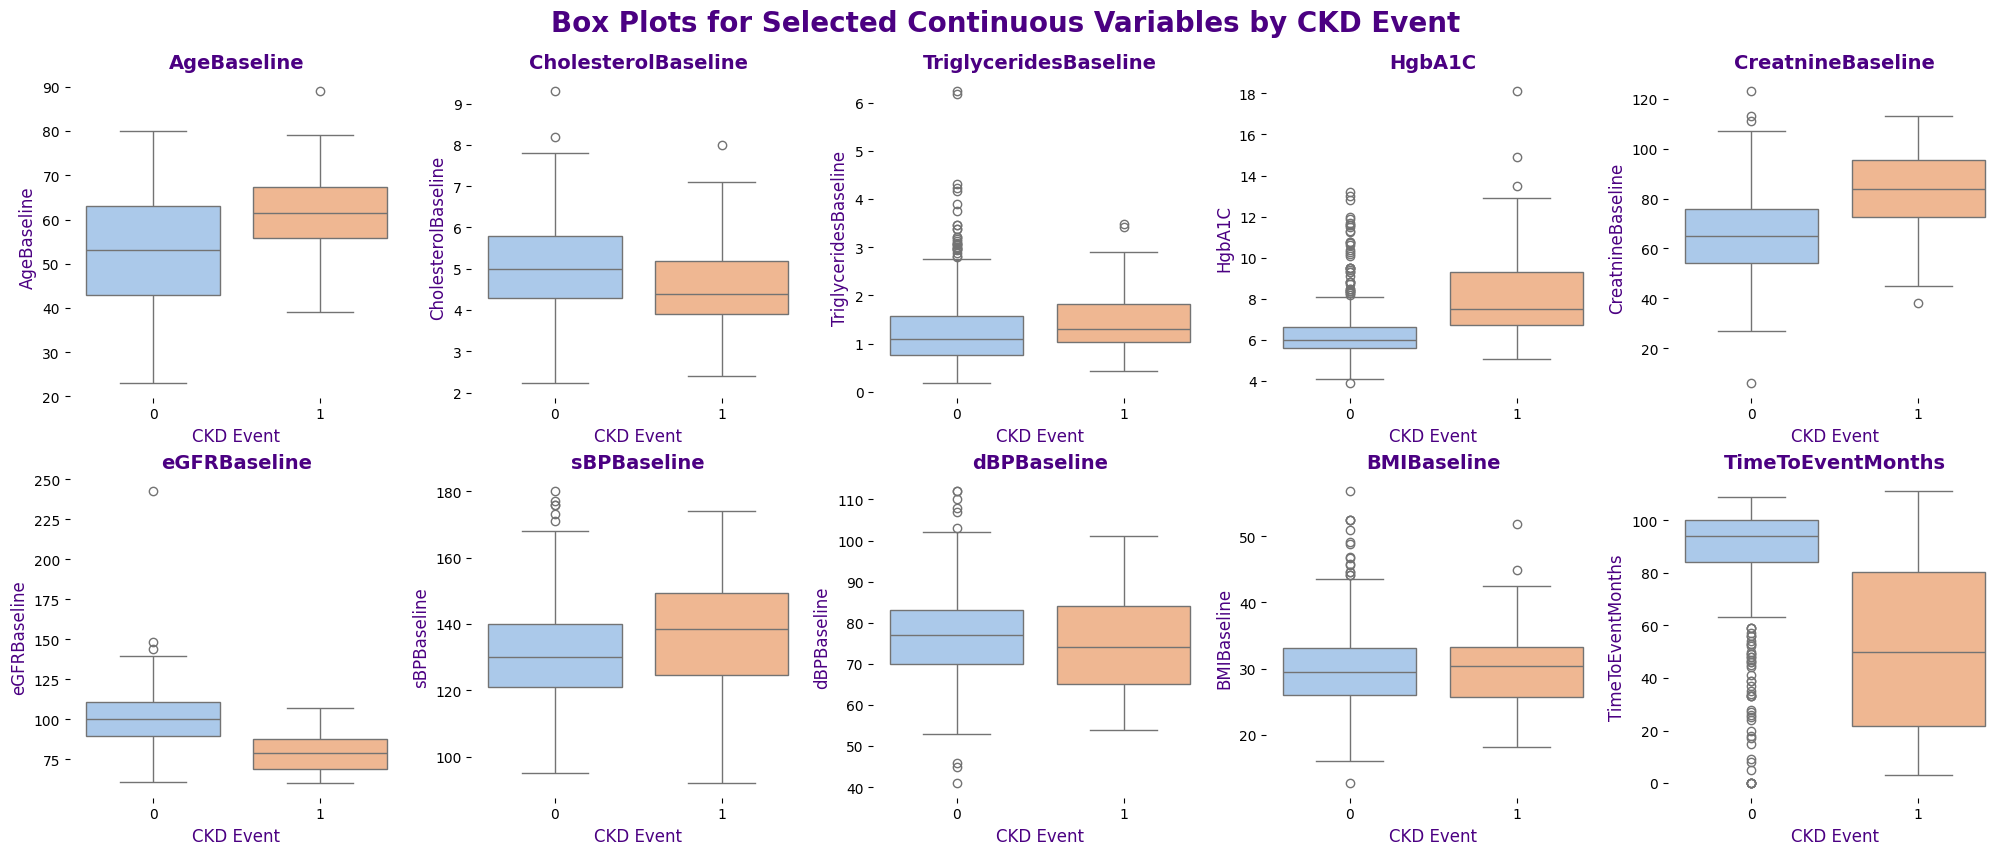

In [10]:
# List of continuous variables
continuous_vars = [
    'AgeBaseline', 'CholesterolBaseline', 'TriglyceridesBaseline', 'HgbA1C', 
    'CreatnineBaseline', 'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'BMIBaseline', 
    'TimeToEventMonths'
]

# Define a pastel color palette
palette = sns.color_palette("pastel")

# Calculate the number of rows and columns for the subplot grid
num_plots = len(continuous_vars)
num_cols = 5  # Number of plots per row
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4), constrained_layout=True)
fig.patch.set_facecolor('white')
fig.suptitle('Box Plots for Selected Continuous Variables by CKD Event', fontsize=20, fontweight='bold', color='#4B0082', y=1.05)

# Create box plots
for i, var in enumerate(continuous_vars):
    sns.boxplot(x='EventCKD35', y=var, data=df, palette=palette, ax=axes.flatten()[i])
    axes.flatten()[i].set_title(f'{var}', fontsize=14, fontweight='bold', color='#4B0082')
    axes.flatten()[i].set_xlabel('CKD Event', fontsize=12, color='#4B0082')
    axes.flatten()[i].set_ylabel(var, fontsize=12, color='#4B0082')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

# Set face color for the axes
for ax in axes.flat:
    ax.set_facecolor('white')

# Add dividers for visual separation
for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.show()


<h4 id="handling-outliers-and-calculating-statistics">3.2 Handling Outliers and Calculating Summary Statistics</h4>
<p>In this step, we handle outliers in the continuous variables temporarily to determine their distribution and calculate summary statistics. The following steps are performed:</p>
<ul>
    <li><strong>Removing Outliers using IQR:</strong> The Interquartile Range (IQR) method is used temporarily to identify and remove outliers. Outliers are defined as data points that lie below Q1 - 1.5*IQR or above Q3 + 1.5*IQR, where Q1 is the first quartile and Q3 is the third quartile. This helps in accurately determining the distribution of the data.</li>
    <li><strong>Calculating Summary Statistics:</strong> For each continuous variable, we calculate summary statistics such as mean, median, max, min, first value, last value, standard deviation, mode, chi-square p-value, count of zero values, and total count of values. The chi-square test is used to check if the distribution is normal or skewed.</li>
    <li><strong>Determining Distribution Type:</strong> Based on the chi-square p-value, we determine if the distribution of each variable is normal or skewed. If the p-value is greater than 0.05, the distribution is considered normal; otherwise, it is considered skewed.</li>
    <li><strong>Selecting Measure:</strong> Depending on the distribution type, we select either the mean (for normal distribution) or the median (for skewed distribution) as the representative measure for each variable.</li>
</ul>
<p>By temporarily removing outliers and selecting appropriate measures, we ensure that the summary statistics are more representative and suitable for analysis and modeling.</p>


In [11]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))
    return df.loc[filter]

# List of continuous variables
continuous_vars = [
    'AgeBaseline', 'CholesterolBaseline', 'TriglyceridesBaseline', 'HgbA1C', 
    'CreatnineBaseline', 'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'BMIBaseline','TimeToEventMonths'
]

# Calculate summary statistics
summary_stats = []
for var in continuous_vars:
    var_df = df[['StudyID', var]].dropna()
    if not var_df.empty:
        # Remove outliers from the column
        var_df = remove_outliers_iqr(var_df, var)
       
        if not var_df.empty:  # Check again if the dataframe is not empty after removing outliers
            chi_stat, chi_p_value = chisquare(var_df[var])
           
            stats = {
                'variable': var,
                'mean': var_df[var].mean(),
                'median': var_df[var].median(),
                'max': var_df[var].max(),
                'min': var_df[var].min(),
                'first': var_df[var].iloc[0],
                'last': var_df[var].iloc[-1],
                'std': var_df[var].std(),
                'mode': var_df[var].mode().iloc[0] if not var_df[var].mode().empty else np.nan,
                'chi_p_value': chi_p_value,
                'zero_count': (var_df[var] == 0).sum(),  # Count of zero values
                'total_count': var_df[var].count()  # Total count of values
            }
            summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
summary_df = summary_df.set_index('variable')

# Define the distribution type function
def determine_distribution(row):
    if pd.isna(row['mean']) or pd.isna(row['median']) or pd.isna(row['std']):
        return 'Unknown'
    # If p-value is greater than 0.05, the distribution is likely normal
    if row['chi_p_value'] > 0.05:
        return 'Normal'
    else:
        return 'Skewed'

# Apply the distribution type function
summary_df['distribution'] = summary_df.apply(determine_distribution, axis=1)

# Define the guidelines function
def select_measure(row):
    if row['distribution'] == 'Normal':
        return 'mean'
    else:
        return 'median'

# Apply the guidelines to select the measure
summary_df['selected_measure'] = summary_df.apply(select_measure, axis=1)

# Display the updated summary statistics with the selected measure and distribution
display(summary_df)

,mean,median,max,min,first,last,std,mode,chi_p_value,zero_count,total_count,distribution,selected_measure
variable,,,,,,,,,,,,,
AgeBaseline,53.203666,54.000000,89.000000,23.000000,64.000000,24.000000,13.821282,55.000000,2.343996e-142,0,491,Skewed,median
CholesterolBaseline,4.963149,5.000000,8.000000,2.230000,4.800000,2.230000,1.071407,5.000000,1.000000e+00,0,489,Normal,mean
TriglyceridesBaseline,1.182722,1.080000,2.880000,0.180000,0.920000,0.660000,0.555047,0.600000,1.000000e+00,0,458,Normal,mean
HgbA1C,6.134126,6.000000,8.700000,3.900000,5.900000,4.300000,0.849833,6.000000,1.000000e+00,0,429,Normal,mean
CreatnineBaseline,67.870552,66.000000,113.000000,27.000000,59.000000,65.000000,17.559075,59.000000,6.647341e-218,0,489,Skewed,median
eGFRBaseline,97.623754,97.985601,139.719503,60.049838,93.319050,129.469943,17.080334,71.468305,4.008984e-97,0,488,Skewed,median
sBPBaseline,130.822680,130.000000,171.000000,92.000000,144.000000,121.000000,14.975238,122.000000,1.347847e-20,0,485,Skewed,median
dBPBaseline,76.734990,77.000000,103.000000,53.000000,87.000000,55.000000,9.928173,80.000000,2.277022e-05,0,483,Skewed,median
BMIBaseline,29.569108,29.304968,43.556870,16.109246,40.161842,21.227691,5.156991,21.936347,9.427861e-01,0,473,Normal,mean


<h4 id="handling-missing-values">Handling Missing Values</h4>
<p>In this step, we fill in the missing values in the dataset using a strategy based on the distribution type of each variable. This ensures that the imputed values are representative of the underlying data distribution. Here are the steps involved:</p>
<ul>
    <li><strong>Selecting the Measure for Imputation:</strong> For each variable, the summary statistics table provides a recommended measure (mean or median) based on the distribution type (normal or skewed). If the distribution is normal, the mean is used; if skewed, the median is used.</li>
    <li><strong>Filling Missing Values:</strong> The <code>fill_missing_values</code> function iterates over each variable and fills the missing values with the selected measure. This helps in maintaining the integrity of the data while handling missing values effectively.</li>
</ul>
<p>By using appropriate measures for imputation based on the distribution type, we ensure that the filled values do not skew the data and provide a more accurate representation for further analysis and modeling.</p>


In [12]:
# Function to fill missing values based on selected measure
def fill_missing_values(df, summary_df):
    for var, row in summary_df.iterrows():
        measure = row['selected_measure']
        fill_value = row[measure]
        df[var] = df[var].fillna(fill_value)
    return df

# Fill missing values in the original dataframe
df = fill_missing_values(df, summary_df)

<h4 id="understanding-the-data">Understanding the Data: Demographic Insights</h4>
<p>In this step, we explore the demographic characteristics of the dataset. Understanding the distribution of key demographic variables can provide insights into the composition of the dataset and highlight any potential biases. Here are the steps performed:</p>
<ul>
    <li><strong>Gender Distribution:</strong> We calculate the count of male and female patients in the dataset and visualize it using a pie chart. This helps to understand the gender balance in the study.</li>
    <li><strong>Age Group Distribution:</strong> Patients are categorized into different age groups, and the count of patients in each group is visualized using a bar chart. The age categories are mapped to their corresponding age ranges based on the baseline age data.</li>
    <li><strong>Total and CKD Patients:</strong> We calculate the total number of patients in the dataset and the number of patients diagnosed with CKD (Chronic Kidney Disease). The percentage of CKD patients is also calculated to understand the prevalence of the condition in the dataset.</li>
</ul>
<p>By visualizing these demographic variables, we gain a clearer understanding of the dataset's composition, which is crucial for subsequent analysis and modeling.</p>


C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\3829526955.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Age.3.categories', order=age_group_order, palette=palette, ax=axes[2])
C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\3829526955.py:41: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.countplot(data=df, x='Age.3.categories', order=age_group_order, palette=palette, ax=axes[2])
C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\3829526955.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(age_group_labels, rotation=45, fontsize=14, color='#4B0082')


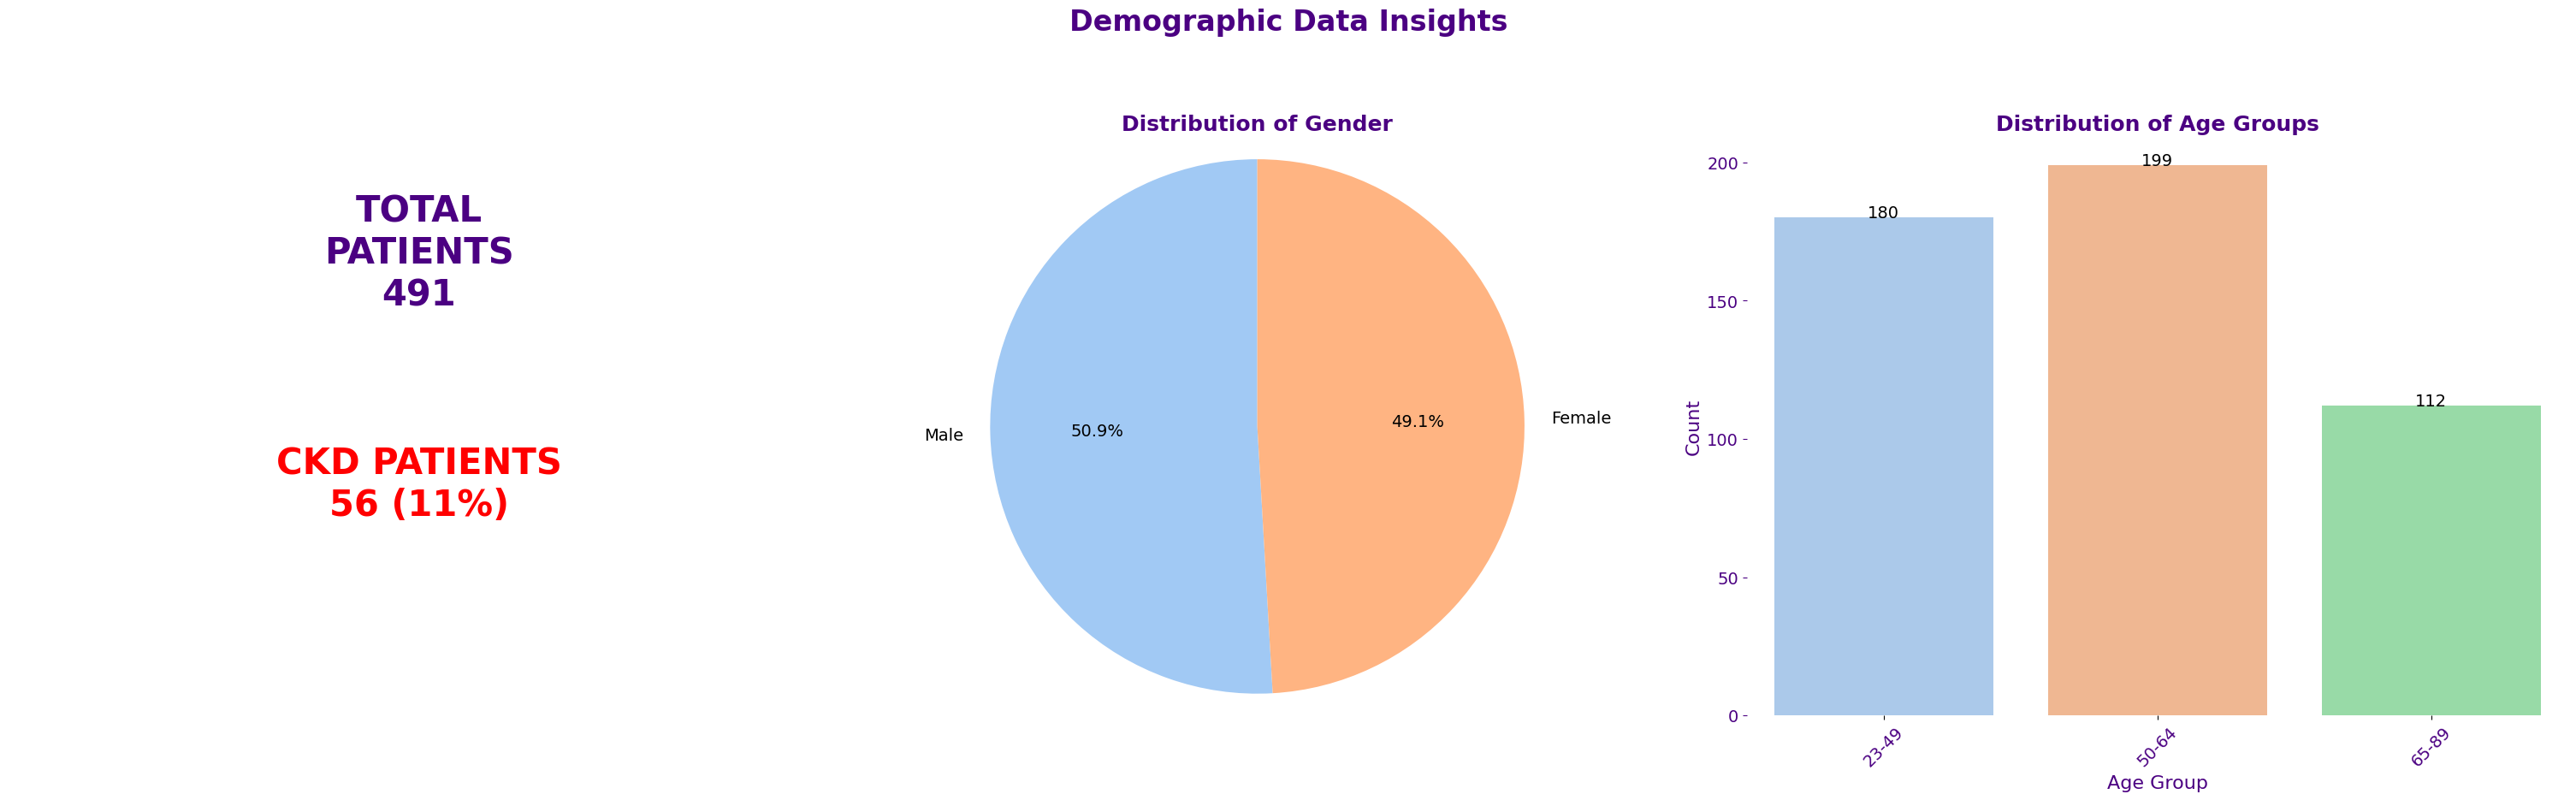

In [13]:
# Calculate distributions
gender_counts = df['Gender'].value_counts()
age_group_counts = df['Age.3.categories'].value_counts()
age_group_order = sorted(age_group_counts.index) 

# Map age categories to actual age ranges based on AgeBaseline
age_category_ranges = {
    0: f"{df[df['Age.3.categories'] == 0]['AgeBaseline'].min()}-{df[df['Age.3.categories'] == 0]['AgeBaseline'].max()}",
    1: f"{df[df['Age.3.categories'] == 1]['AgeBaseline'].min()}-{df[df['Age.3.categories'] == 1]['AgeBaseline'].max()}",
    2: f"{df[df['Age.3.categories'] == 2]['AgeBaseline'].min()}-{df[df['Age.3.categories'] == 2]['AgeBaseline'].max()}"
}
age_group_labels = [age_category_ranges[i] for i in age_group_order]

# Total patients and patients who have CKD
total_patients = df['StudyID'].nunique()
ckd_patients = df[df['EventCKD35'] == 1]['StudyID'].nunique()
ckd_percentage = (ckd_patients / total_patients) * 100

# Define a pastel color palette
palette = sns.color_palette("pastel")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 8), constrained_layout=True)
fig.patch.set_facecolor('white')
fig.suptitle('Demographic Data Insights', fontsize=24, fontweight='bold', color='#4B0082', y=1.15)

# Total patients and patients with CKD
axes[0].text(0.5, 0.8, f"TOTAL\nPATIENTS\n{total_patients}", fontsize=30, fontweight='bold', color='#4B0082', ha='center', va='center')
axes[0].text(0.5, 0.4, f"CKD PATIENTS\n{ckd_patients} ({ckd_percentage:.0f}%)", fontsize=30, fontweight='bold', color='red', ha='center', va='center')
axes[0].axis('off')
axes[0].set_facecolor('white')

# Pie chart for gender distribution
gender_labels = ['Male' if i == 1 else 'Female' for i in gender_counts.index]
axes[1].pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=palette, textprops={'fontsize': 14})
axes[1].set_title('Distribution of Gender', fontsize=18, fontweight='bold', color='#4B0082')
axes[1].axis('equal')
axes[1].set_facecolor('white')

# Bar chart for age group distribution with value annotations
ax = sns.countplot(data=df, x='Age.3.categories', order=age_group_order, palette=palette, ax=axes[2])
axes[2].set_title('Distribution of Age Groups', fontsize=18, fontweight='bold', color='#4B0082')
axes[2].set_xlabel('Age Group', fontsize=16, color='#4B0082')
axes[2].set_ylabel('Count', fontsize=16, color='#4B0082')
axes[2].set_xticklabels(age_group_labels, rotation=45, fontsize=14, color='#4B0082')
axes[2].tick_params(axis='y', labelsize=14, colors='#4B0082')
axes[2].grid(False)

# Set y-ticks to 0, 50, 100, 150, 200
axes[2].set_yticks([0, 50, 100, 150, 200])
axes[2].set_facecolor('white')

# Annotate bar chart with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=14, color='black')

# Set face color for the axes
for ax in axes.flat:
    ax.set_facecolor('white')

# Add dividers for visual separation
for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Adjust layout to ensure proper spacing
plt.show()


<h4 id="exploring-and-visualizing-egfr-stages">Exploring and Visualizing eGFR Stages</h4>


In [14]:
plt.figure(figsize=(5, 5))
eGFR_counts = df['eGFR Stage'].value_counts()
colors = ['#FFB1B1', '#FFCBCB', '#FFEAED']  # Using the color palette provided
plt.pie(eGFR_counts, labels=eGFR_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('eGFR Stage')
plt.savefig('pie_chart_palette.png')
plt.close()

# HTML content with the desired layout and new styling
html_content = """
<div style="display: flex; flex-direction: row; align-items: flex-start;">
    <div style="flex: 1; padding-right: 20px;">
        <h2>Description of the eGFR Test</h2>
        <p>The estimated glomerular filtration rate (eGFR) is a calculation used to estimate how well your kidneys are filtering certain agents produced by your body</p>
        <ul>
            <li><strong>Creatinine</strong>: A waste product that comes from the normal wear and tear on muscles.</li>
            <li><strong>Cystatin C</strong>: A protein that slows down the breakdown of other protein cells.</li>
        </ul>
        <h2>Stages of Chronic Kidney Disease (CKD)</h2>
        <table border="1" cellpadding="5" cellspacing="0" style="margin-left: 0; text-align: left; width: 80%;">
            <tr style="background-color: #FFB1B1; font-weight: bold;">
                <th>Stage</th>
                <th>Description</th>
                <th>eGFR (mL/min/1.73m²)</th>
                <th>Kidney Function</th>
            </tr>
            <tr style="background-color: #FFCBCB;">
                <td style="text-align: center; font-weight: bold; color: red;">1</td>
                <td>Possible kidney damage (e.g., protein in the urine) with <em>normal</em> kidney function</td>
                <td>90 or above</td>
                <td><img src="https://www.kidney.org/sites/default/files/icon_filled_kidney_90-100.svg" alt="90-100%" width="50" height="50"></td>
            </tr>
            <tr style="background-color: #FFEAED;">
                <td style="text-align: center; font-weight: bold; color: red;">2</td>
                <td>Kidney damage with <em>mild loss</em> of kidney function</td>
                <td>60-89</td>
                <td><img src="https://www.kidney.org/sites/default/files/icon_filled_kidney_60-89.svg" alt="60-89%" width="50" height="50"></td>
            </tr>
            <tr style="background-color: #FFEAE3;">
                <td style="text-align: center; font-weight: bold; color: red;">3a</td>
                <td><em>Mild to moderate</em> loss of kidney function</td>
                <td>45-59</td>
                <td><img src="https://www.kidney.org/sites/default/files/icon_filled_kidney_45-59.svg" alt="45-59%" width="50" height="50"></td>
            </tr>
            <tr style="background-color: #FFCBCB;">
                <td style="text-align: center; font-weight: bold; color: red;">3b</td>
                <td><em>Moderate to severe</em> loss of kidney function</td>
                <td>30-44</td>
                <td><img src="https://www.kidney.org/sites/default/files/icon_filled_kidney_30-44.svg" alt="30-44%" width="50" height="50"></td>
            </tr>
            <tr style="background-color: #FFEAED;">
                <td style="text-align: center; font-weight: bold; color: red;">4</td>
                <td><em>Severe loss</em> of kidney function</td>
                <td>15-29</td>
                <td><img src="https://www.kidney.org/sites/default/files/icon_filled_kidney_15-29.svg" alt="15-29%" width="50" height="50"></td>
            </tr>
            <tr style="background-color: #FFEAE3;">
                <td style="text-align: center; font-weight: bold; color: red;">5</td>
                <td>Kidney <em>failure</em></td>
                <td>Less than 15</td>
                <td><img src="https://www.kidney.org/sites/default/files/icon_filled_kidney_under-15.svg" alt="Less than 15%" width="50" height="50"></td>
            </tr>
        </table>
    </div>
    <div style="flex: 1; text-align: center; padding-left: 20px;">
        <div style="border-left: 2px solid gray; height: 100%; padding-left: 20px;">
            <h2 style="margin-top: 0;">eGFR Distribution in Our Data</h2>
            <img src="pie_chart_palette.png" alt="eGFR Pie Chart" style="width:70%; height:auto; margin-top: 10px;">
        </div>
    </div>
</div>
"""

display(HTML(html_content))


Stage,Description,eGFR (mL/min/1.73m²),Kidney Function
1,"Possible kidney damage (e.g., protein in the urine) with normal kidney function",90 or above,
2,Kidney damage with mild loss of kidney function,60-89,
3a,Mild to moderate loss of kidney function,45-59,
3b,Moderate to severe loss of kidney function,30-44,
4,Severe loss of kidney function,15-29,
5,Kidney failure,Less than 15,


<h4 id="exploring-and-visualizing-egfr-stages">Exploring and Visualizing Blood Pressure categories</h4>


In [15]:
# Define the correct order of categories
category_order = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis']

# Update the colors dictionary based on the actual category names and desired palette
colors = {
    'Normal': '#92C7CF',
    'Elevated': '#AAD7D9',
    'Hypertension Stage 1': '#FBF9F1',
    'Hypertension Stage 2': '#E5E1DA',
    'Hypertensive Crisis': '#D1CBC1'  # Adjusted to fit the palette
}

# Plotting the bar chart for Blood Pressure categories with the new color palette and order
plt.figure(figsize=(12, 8))  # Increase the figure size
bp_counts = df['BP Category'].value_counts().reindex(category_order)

# Use the colors in the same order as they appear in the category_order
bar_colors = [colors[cat] for cat in category_order]

bp_counts.plot(kind='bar', color=bar_colors, edgecolor='black')
plt.title('Blood Pressure Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('bp_bar_chart_new_palette.png')
plt.close()

# HTML content with the new description and table
html_content = """
<div style="display: flex; flex-direction: row; align-items: flex-start;">
    <div style="flex: 1; padding-right: 20px;">
        <h2>Description of Blood Pressure</h2>
        <p>High blood pressure and kidney disease are related in two ways:</p>
        <ol>
            <li>High blood pressure is a leading cause of CKD. Over time, it can damage blood vessels and reduce the blood supply to kidneys, causing them to stop removing wastes and extra fluid from your blood, which raises blood pressure further.</li>
            <li>High blood pressure can also be a complication of CKD. Diseased kidneys are less able to regulate blood pressure, causing it to increase. Managing blood pressure can help prevent worsening kidney disease and heart problems.</li>
        </ol>
        <h2>Blood Pressure Categories</h2>
        <table border="1" cellpadding="10" cellspacing="0" style="margin-left: 0; text-align: left; width: 60%;">
            <tr style="background-color: #92C7CF; font-weight: bold;">
                <th>Blood Pressure Category</th>
                <th>Systolic mm Hg (upper number)</th>
                <th>and/or</th>
                <th>Diastolic mm Hg (lower number)</th>
            </tr>
            <tr style="background-color: #92C7CF; height: 50px;">
                <td style="text-align: center; font-weight: bold;">Normal</td>
                <td>Less than 120</td>
                <td>and</td>
                <td>Less than 80</td>
            </tr>
            <tr style="background-color: #AAD7D9; height: 50px;">
                <td style="text-align: center; font-weight: bold;">Elevated</td>
                <td>120 – 129</td>
                <td>and</td>
                <td>Less than 80</td>
            </tr>
            <tr style="background-color: #FBF9F1; height: 50px;">
                <td style="text-align: center; font-weight: bold;">Hypertension Stage 1</td>
                <td>130 – 139</td>
                <td>or</td>
                <td>80 – 89</td>
            </tr>
            <tr style="background-color: #E5E1DA; height: 50px;">
                <td style="text-align: center; font-weight: bold;">Hypertension Stage 2</td>
                <td>140 or higher</td>
                <td>or</td>
                <td>90 or higher</td>
            </tr>
            <tr style="background-color: #D1CBC1; height: 50px;">
                <td style="text-align: center; font-weight: bold;">Hypertensive Crisis</td>
                <td colspan="3">Higher than 180 and/or higher than 120</td>
            </tr>
        </table>
    </div>
    <div style="flex: 1; text-align: center; padding-left: 20px;">
        <div style="border-left: 2px solid gray; height: 100%; padding-left: 20px;">
            <h2 style="margin-top: 0;">Blood Pressure Distribution in Our Data</h2>
            <img src="bp_bar_chart_new_palette.png" alt="Blood Pressure Pie Chart" style="width:70%; height:auto; margin-top: 20px;">
        </div>
    </div>
</div>
"""

display(HTML(html_content))


<h4 id="exploring-and-visualizing-bmi-categories">Exploring and Visualizing BMI Categories</h4>


In [16]:
# Define the correct order of categories and use lighter colors
category_order = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
palette = ['#D9EAD3', '#B6D7A8', '#93C47D', '#6AA84F']  # Using a lighter color palette

# Plotting the bar chart for BMI categories with the new color palette and order
plt.figure(figsize=(12, 8))  # Increase the figure size
bmi_counts = df['BMI Category'].value_counts().reindex(category_order)

sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette=palette)
plt.title('BMI Distribution in Our Data', fontsize=16)
plt.xlabel('BMI Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
for i in range(len(bmi_counts)):
    plt.text(i, bmi_counts.values[i] + 1, f"{bmi_counts.values[i]} ({bmi_counts.values[i]/len(df)*100:.1f}%)", ha='center', va='bottom')
plt.savefig('bmi_bar_chart.png')
plt.close()

# HTML content with the new description and table
html_content = """
<div style="display: flex; flex-direction: row; align-items: flex-start;">
    <div style="flex: 1; padding-right: 20px;">
        <h2>BMI and Chronic Kidney Disease (CKD)</h2>
        <p>Obesity is strongly related to the risk of CKD, progression of CKD, and end-stage renal disease (ESRD). Here's a brief overview:</p>
        <ul>
            <li>Obesity increases the risk of developing CKD.</li>
            <li>Obesity is associated with the progression of CKD regardless of underlying pathology.</li>
            <li>In ESRD patients, obesity is paradoxically associated with better survival.</li>
        </ul>
        <h2>BMI Categories</h2>
        <table border="1" cellpadding="5" cellspacing="0" style="margin-left: 0; text-align: left; width: 50%; height: 200px;">
            <tr style="background-color: #D9EAD3; font-weight: bold;">
                <th style="width: 60%; text-align: center;">BMI Category</th>
                <th style="width: 40%; text-align: center;">Range (kg/m²)</th>
            </tr>
            <tr style="background-color: #D9EAD3; height: 35px;">
                <td style="text-align: center; font-weight: bold;">Underweight</td>
                <td style="text-align: center;">Less than 18.5</td>
            </tr>
            <tr style="background-color: #B6D7A8; height: 35px;">
                <td style="text-align: center; font-weight: bold;">Normal Weight</td>
                <td style="text-align: center;">18.5 – 24.9</td>
            </tr>
            <tr style="background-color: #93C47D; height: 35px;">
                <td style="text-align: center; font-weight: bold;">Overweight</td>
                <td style="text-align: center;">25 – 29.9</td>
            </tr>
            <tr style="background-color: #6AA84F; height: 35px;">
                <td style="text-align: center; font-weight: bold;">Obese</td>
                <td style="text-align: center;">30 or higher</td>
            </tr>
        </table>
    </div>
    <div style="flex: 1; text-align: center; padding-left: 20px;">
        <div style="border-left: 2px solid gray; height: 100%; padding-left: 20px;">
            <h2 style="margin-top: 0;">BMI Distribution in Our Data</h2>
            <img src="bmi_bar_chart.png" alt="BMI Bar Chart" style="width:70%; height:auto; margin-top: 20px;">
        </div>
    </div>
</div>
"""

display(HTML(html_content))

C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\2804564987.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette=palette)


BMI Category,Range (kg/m²)
Underweight,Less than 18.5
Normal Weight,18.5 – 24.9
Overweight,25 – 29.9
Obese,30 or higher


<h4 id="creating-dummy-variables-and-avoiding-multicollinearity">4.1 Creating Dummy Variables and Avoiding Multicollinearity</h4>
<p>In this step, we prepare the dataset for machine learning by creating dummy variables for categorical features and removing the original continuous variables that were categorized:</p>
<ul>
    
    <li><strong>Creating Dummy Variables:</strong> We use the <code>pd.get_dummies</code> function to convert categorical variables into a set of binary (0 or 1) dummy variables. This is necessary for many machine learning algorithms that require numerical input.</li>
    <li><strong>Dropping the First Dummy Variable:</strong> To avoid multicollinearity (where two or more variables are highly correlated), we drop the first dummy variable of each set using the <code>drop_first=True</code> parameter. This helps in reducing redundancy in the dataset.</li>
    <li><strong>Removing Original Continuous Variables:</strong> We remove the original continuous variables that were used to create the categorical variables. These include baseline measurements like cholesterol, triglycerides, HgbA1C, creatinine, eGFR, and blood pressure. This step ensures that our dataset only includes the processed categorical data.</li>
</ul>
<p>By creating dummy variables and removing multicollinearity, we ensure that the dataset is properly formatted for machine learning algorithms, which helps improve model performance and interpretability.</p>


In [17]:
# Create dummy variables and drop the first column of each set to avoid multicollinearity
df = pd.get_dummies(df, columns=['Triglycerides Category', 'eGFR Stage', 'BP Category', 'BMI Category', 'Cholesterol Category','Age.3.categories'], drop_first=True).astype(int)
df.drop(columns=['CholesterolBaseline', 'TriglyceridesBaseline', 'HgbA1C', 'CreatnineBaseline', 'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'BMIBaseline'], inplace=True)

<h4 id="feature-distribution-for-ckd-patients">Feature Distribution for CKD Patients</h4>
<p>This visualization shows the distribution of various features among patients diagnosed with chronic kidney disease (CKD). The chart illustrates the total number of CKD patients (56) and highlights the count and proportion of patients with specific features. For example, 91% of CKD patients have a history of hypertension (HTN), and 84% have a history of dyslipidemia (DLD).</p>

In [18]:
df.columns

Index(['StudyID', 'Gender', 'AgeBaseline', 'HistoryDiabetes', 'HistoryCHD',
       'HistoryVascular', 'HistorySmoking', 'HistoryHTN', 'HistoryDLD',
       'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB',
       'TimeToEventMonths', 'EventCKD35', 'Creatine Flag', 'HgbA1C Flag',
       'Triglycerides Category_High', 'Triglycerides Category_Normal',
       'Triglycerides Category_Very high', 'eGFR Stage_Stage 2',
       'BP Category_Hypertension Stage 1', 'BP Category_Hypertension Stage 2',
       'BP Category_Normal', 'BMI Category_Obese', 'BMI Category_Overweight',
       'BMI Category_Underweight', 'Cholesterol Category_High',
       'Cholesterol Category_Normal', 'Age.3.categories_1',
       'Age.3.categories_2'],
      dtype='object')

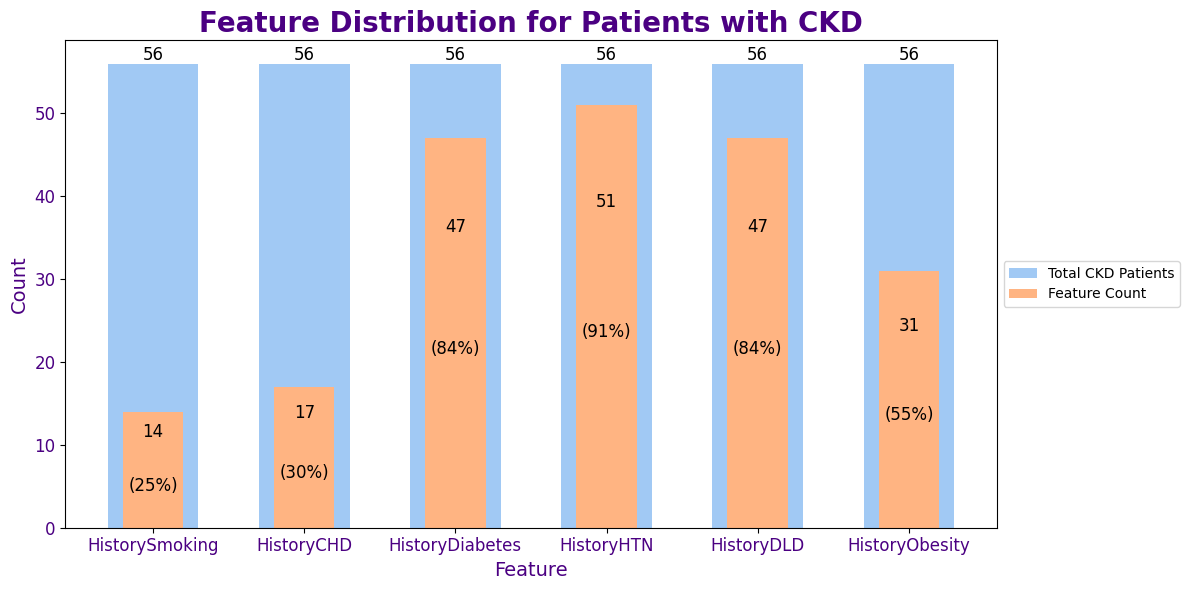

In [19]:
# Filter the dataset for patients with EventCKD35 = 1
ckd_patients_df = df[df['EventCKD35'] == 1]

# Define the features to analyze
features_to_analyze = ['HistorySmoking', 'HistoryCHD', 'HistoryDiabetes', 'HistoryHTN', 'HistoryDLD', 'HistoryObesity']

# Create a DataFrame to store the counts
feature_counts = ckd_patients_df[features_to_analyze].sum().reset_index()
feature_counts.columns = ['Feature', 'Count']

# Add a row for the total number of CKD patients
total_ckd_patients = len(ckd_patients_df)
feature_counts['Total'] = total_ckd_patients

# Calculate the proportion of each feature
feature_counts['Proportion'] = feature_counts['Count'] / feature_counts['Total']

# Define a pastel color palette
palette = sns.color_palette("pastel")
blue_color = palette[0]
orange_color = palette[1]

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(feature_counts['Feature'], feature_counts['Total'], color=blue_color, label='Total CKD Patients', width=0.6)
bars_orange = plt.bar(feature_counts['Feature'], feature_counts['Count'], color=orange_color, label='Feature Count', width=0.4)

# Annotate the bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12, color='black')

for bar in bars_orange:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval - yval / 4, f'{int(yval)}', ha='center', va='bottom', fontsize=12, color='black')
    plt.text(bar.get_x() + bar.get_width() / 2, yval - yval / 2 - 3, f'({yval/total_ckd_patients:.0%})', ha='center', va='bottom', fontsize=12, color='black')

# Add labels and title
plt.title('Feature Distribution for Patients with CKD', fontsize=20, fontweight='bold', color='#4B0082')
plt.xlabel('Feature', fontsize=14, color='#4B0082')
plt.ylabel('Count', fontsize=14, color='#4B0082')
plt.xticks(fontsize=12, color='#4B0082', rotation=0, ha='center')
plt.yticks(fontsize=12, color='#4B0082')

# Add legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()


<h4 id="finding-highly-correlated-columns">3.9 Finding Highly Correlated Columns</h4>
<p>To avoid multicollinearity and understand the relationships between different features, we calculate and visualize the correlation matrix. This helps in identifying features that are highly correlated, which can be problematic for certain machine learning models. By examining the correlation matrix, we can decide which features to keep or remove to ensure model stability and performance.</p>


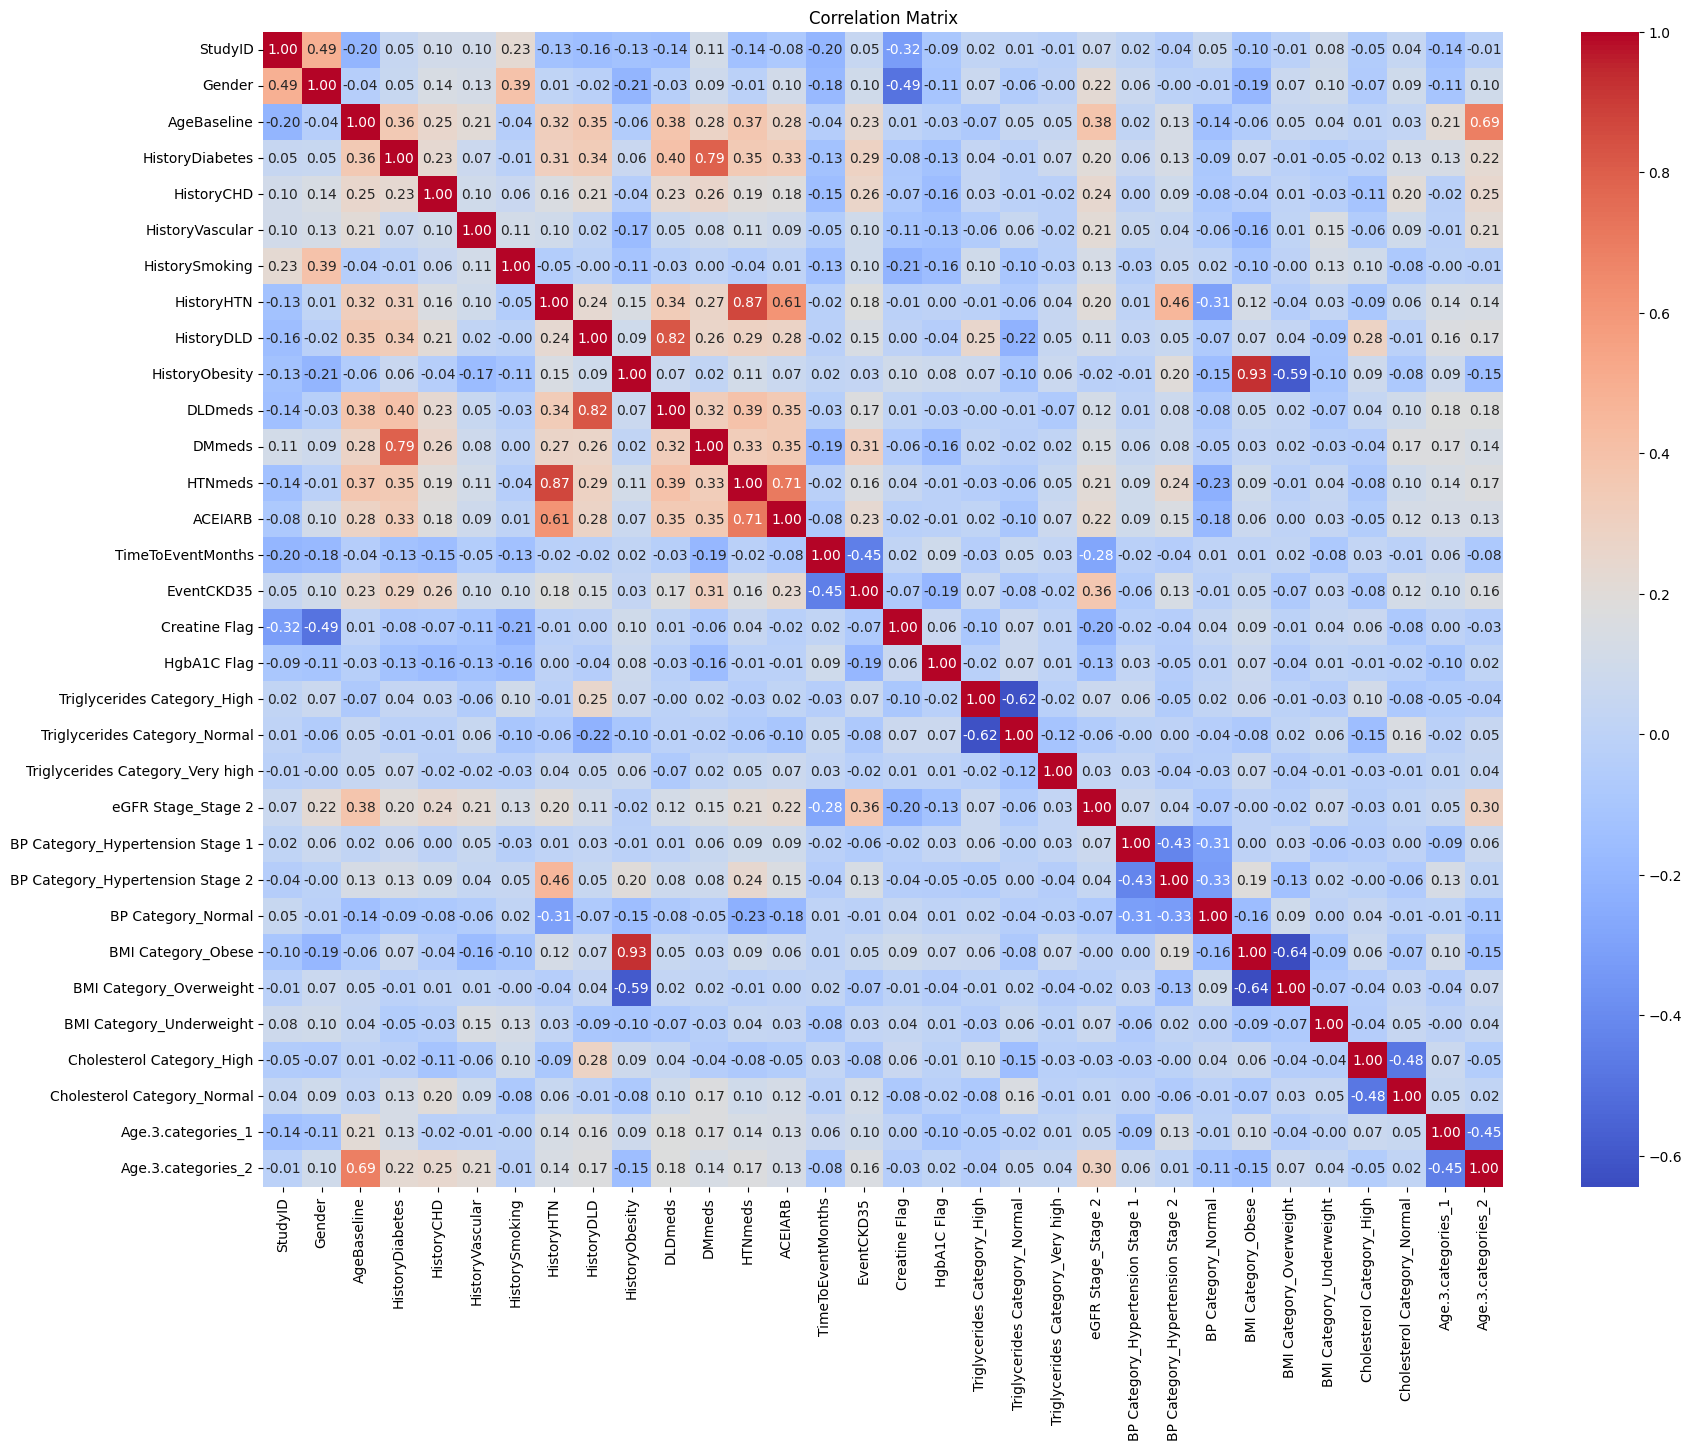

In [20]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Visualize the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [21]:
df.columns

Index(['StudyID', 'Gender', 'AgeBaseline', 'HistoryDiabetes', 'HistoryCHD',
       'HistoryVascular', 'HistorySmoking', 'HistoryHTN', 'HistoryDLD',
       'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB',
       'TimeToEventMonths', 'EventCKD35', 'Creatine Flag', 'HgbA1C Flag',
       'Triglycerides Category_High', 'Triglycerides Category_Normal',
       'Triglycerides Category_Very high', 'eGFR Stage_Stage 2',
       'BP Category_Hypertension Stage 1', 'BP Category_Hypertension Stage 2',
       'BP Category_Normal', 'BMI Category_Obese', 'BMI Category_Overweight',
       'BMI Category_Underweight', 'Cholesterol Category_High',
       'Cholesterol Category_Normal', 'Age.3.categories_1',
       'Age.3.categories_2'],
      dtype='object')

<h4 id="dropping-highly-correlated-columns">Dropping Highly Correlated Columns</h4>
<p>Following the identification of highly correlated columns, we now drop these columns to avoid multicollinearity. This step helps to improve the model's performance by removing redundant information.</p>


In [22]:
# Define the columns to drop
columns_to_drop = ['AgeBaseline', 'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'BP Category_Hypertension Stage 1',"eGFRBaseline","sBPBaseline", 'BP Category_Normal',"CholesterolBaseline","CreatnineBaseline","TriglyceridesBaseline",'HgbA1C',"BMIBaseline","dBPBaseline"]

# Filter the columns to drop based on which columns are actually present in the DataFrame
columns_to_drop_in_df = [col for col in columns_to_drop if col in df.columns]
columns_to_drop_in_summary_df = [col for col in columns_to_drop if col in summary_df.index]

# Drop the specified columns from df
df.drop(columns=columns_to_drop_in_df, inplace=True)

# Drop the specified columns from summary_df
summary_df.drop(index=columns_to_drop_in_summary_df, inplace=True)

<h4 id="correlation-with-target-variable">Correlation with Target Variable</h4>
<p>To understand the relationship between the target variable, which indicates the presence of chronic kidney disease (CKD), and other features in the dataset, we calculate the correlation of each feature with the target variable <code>EventCKD35</code>. This helps in identifying which features have a strong positive or negative correlation with CKD, providing insights into the factors that are most associated with the disease.</p>


C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\652664138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index, palette='coolwarm')


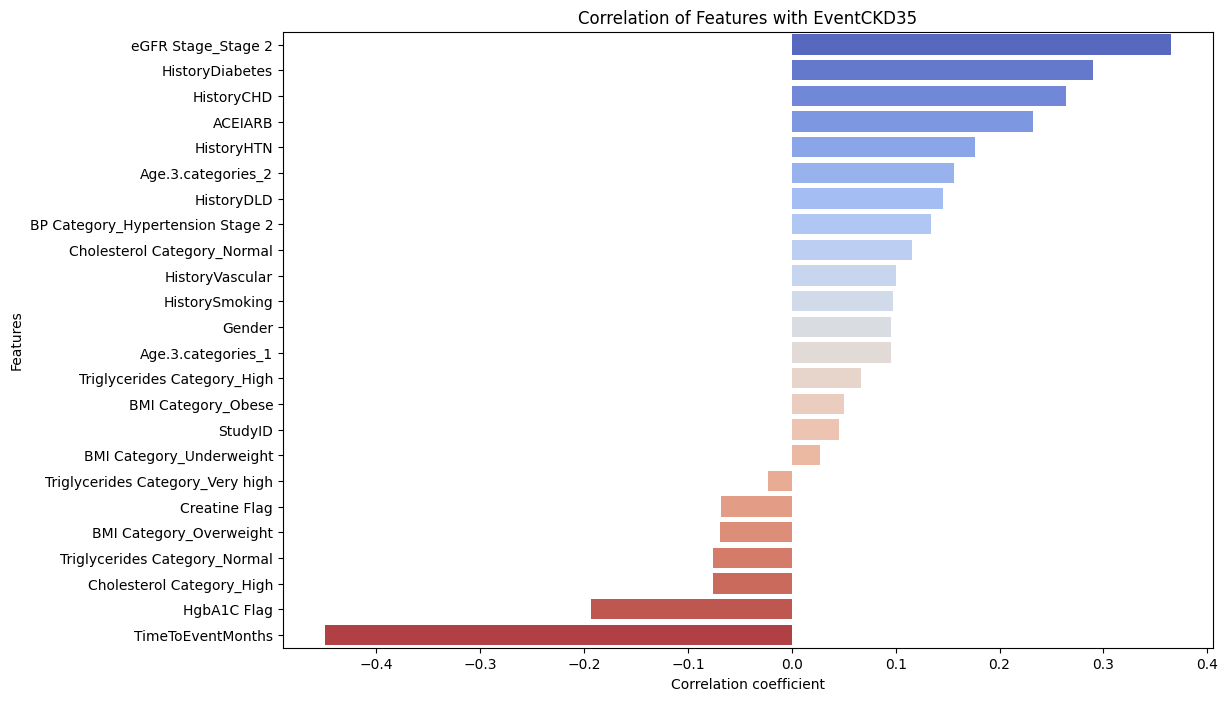

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get correlation with the target variable 'EventCKD35'
target_corr = correlation_matrix['EventCKD35'].drop('EventCKD35')

# Sort the correlations
target_corr_sorted = target_corr.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index, palette='coolwarm')
plt.title('Correlation of Features with EventCKD35')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.show()


<h4>Survival Analysis Results</h4>
<p>Survival Analysis is a statistical method used to analyze the time until an event of interest occurs, such as the onset of a disease, failure of a mechanical system, or death. In this context, the event of interest is the development of Chronic Kidney Disease (CKD).</p>

<h5>Survival Curve</h5>
<p>This graph shows the probability of patients not developing CKD over time. It helps to visualize and compare the survival probabilities of different groups.</p>

<h5>Kaplan-Meier Estimator</h5>
<p>This is a non-parametric statistic used to estimate the survival function from lifetime data. It plots the probability of surviving in a given length of time while considering the occurrence of events.</p>

<p>The survival analysis in this plot compares two groups:</p>
<ul>
    <li><strong>EventCKD35 = 1 (blue line)</strong>: Patients who developed CKD. The curve shows a decreasing survival probability over time, indicating that more patients develop CKD as time progresses.</li>
    <li><strong>EventCKD35 = 0 (orange line)</strong>: Patients who did not develop CKD. The curve remains constant at a survival probability of 1.0, indicating no CKD events during the observation period.</li>
</ul>

<p>The shaded area around the blue line represents the confidence interval, providing a range of uncertainty around the survival probability estimate. This analysis helps in understanding the risk and timing of CKD onset among the patients.</p>


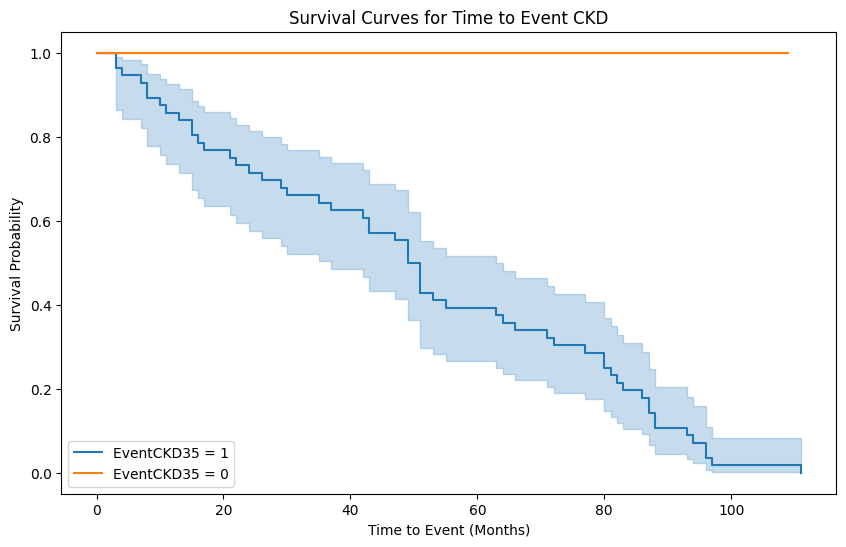

In [24]:

# Separate the data based on EventCKD35
event_data = df[df['EventCKD35'] == 1]
no_event_data = df[df['EventCKD35'] == 0]

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the model for the event group
kmf.fit(event_data['TimeToEventMonths'], event_observed=event_data['EventCKD35'])
plt.figure(figsize=(10, 6))
kmf.plot(label='EventCKD35 = 1')

# Fit the model for the no-event group
kmf.fit(no_event_data['TimeToEventMonths'], event_observed=no_event_data['EventCKD35'])
kmf.plot(label='EventCKD35 = 0')

plt.title('Survival Curves for Time to Event CKD')
plt.xlabel('Time to Event (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


<h4 id="preprocessing-the-data">Preprocessing the Data</h4>
<p>In this step, we prepare our data for machine learning modeling by performing feature extraction, splitting the data, and applying appropriate scaling based on feature distribution.</p>

<ol>
    <li><strong>Extract Features and Target:</strong> We separate the features (<code>X</code>) from the target variable (<code>y</code>). The target variable in this case is <code>EventCKD35</code>, which indicates whether a patient developed CKD.</li>
    <li><strong>Split the Data:</strong> The data is split into training and testing sets with stratification to maintain the distribution of the target variable in both sets.</li>
    <li><strong>Initialize Scalers:</strong> Two scalers are initialized: <code>StandardScaler</code> for normally distributed features and <code>MinMaxScaler</code> for skewed features.</li>
    <li><strong>Extract Scaling Methods:</strong> We determine the appropriate scaling method for each variable based on its distribution and store this information in the <code>scaling_methods</code> dictionary.</li>
    <li><strong>Scale the Training Data:</strong> We apply the appropriate scaling to the training data. For variables with a normal distribution, the <code>StandardScaler</code> is used, while the <code>MinMaxScaler</code> is applied to skewed variables.</li>
    <li><strong>Scale the Testing Data:</strong> The same scaling is applied to the testing data using the fitted scalers from the training data.</li>
</ol>
<p>This preprocessing step ensures that all features are appropriately scaled, which helps in improving the performance and convergence of machine learning models.</p>



## Optimal number of features:

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the binary columns
binary_columns = [
    'Gender', 'HistoryDiabetes', 'HistoryCHD', 'HistoryVascular',
    'HistorySmoking', 'HistoryHTN', 'HistoryDLD', 'ACEIARB',
    'Creatine Flag', 'HgbA1C Flag', 'Triglycerides Category_High', 
    'Triglycerides Category_Normal', 'Triglycerides Category_Very high', 
    'eGFR Stage_Stage 2', 'BP Category_Hypertension Stage 2', 
    'BMI Category_Obese', 'BMI Category_Overweight', 
    'BMI Category_Underweight', 'Cholesterol Category_High', 
    'Cholesterol Category_Normal', 'Age.3.categories_1', 'Age.3.categories_2'
]

# Assume df is your dataframe
# thX should not include e target variable 'EventCKD35'
X = df.drop(['EventCKD35', 'StudyID'], axis=1)  # Features
y = df['EventCKD35']  # Target

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Extract the scaling method for each variable
scaling_methods = summary_df['selected_measure'].to_dict()

# Apply the appropriate scaling to the entire dataset
X_scaled = X.copy()
for var, method in scaling_methods.items():
    if var not in binary_columns:
        if method == 'mean':  # Normal distribution
            X_scaled[var] = standard_scaler.fit_transform(X[[var]])
        else:  # Skewed distribution
            X_scaled[var] = min_max_scaler.fit_transform(X[[var]])

# Function to find the optimal number of features using cross-validation
def find_optimal_features_cv(selector, X, y, cv=10):
    scores = []
    for k in range(1, X.shape[1] + 1):
        selector_k = selector(k)
        X_k = selector_k.fit_transform(X, y)
        model = LogisticRegression(max_iter=2000)
        score = np.mean(cross_val_score(model, X_k, y, cv=cv, scoring='accuracy'))
        scores.append(score)
    optimal_k = np.argmax(scores) + 1
    return optimal_k, scores

# Evaluate SelectKBest with ANOVA F-test
optimal_k_anova, scores_anova = find_optimal_features_cv(lambda k: SelectKBest(score_func=f_classif, k=k), X_scaled, y)
selector_anova = SelectKBest(score_func=f_classif, k=optimal_k_anova)
X_anova = selector_anova.fit_transform(X_scaled, y)
model_anova = LogisticRegression(max_iter=1000)
cv_anova = StratifiedKFold(n_splits=10)
anova_scores = cross_val_score(model_anova, X_anova, y, cv=cv_anova, scoring='accuracy')
accuracy_anova = np.mean(anova_scores)

# Evaluate RFE with Logistic Regression
optimal_k_rfe, scores_rfe = find_optimal_features_cv(lambda k: RFE(LogisticRegression(max_iter=1000), n_features_to_select=k), X_scaled, y)
selector_rfe = RFE(LogisticRegression(max_iter=1000), n_features_to_select=optimal_k_rfe)
X_rfe = selector_rfe.fit_transform(X_scaled, y)
model_rfe = LogisticRegression(max_iter=1000)
cv_rfe = StratifiedKFold(n_splits=10)
rfe_scores = cross_val_score(model_rfe, X_rfe, y, cv=cv_rfe, scoring='accuracy')
accuracy_rfe = np.mean(rfe_scores)

# Get the selected feature names
selected_features_anova = X.columns[selector_anova.get_support(indices=True)]
selected_features_rfe = X.columns[selector_rfe.get_support(indices=True)]


print("Optimal number of features (ANOVA):", optimal_k_anova)
print("Accuracy with optimal features (ANOVA):", accuracy_anova)
print("Selected features (ANOVA):", selected_features_anova)

print("Optimal number of features (RFE):", optimal_k_rfe)
print("Accuracy with optimal features (RFE):", accuracy_rfe)
print("Selected features (RFE):", selected_features_rfe)

Optimal number of features (ANOVA): 5
Accuracy with optimal features (ANOVA): 0.9165306122448978
Selected features (ANOVA): Index(['HistoryDiabetes', 'HistoryCHD', 'ACEIARB', 'TimeToEventMonths',
       'eGFR Stage_Stage 2'],
      dtype='object')
Optimal number of features (RFE): 4
Accuracy with optimal features (RFE): 0.9185714285714285
Selected features (RFE): Index(['HistoryDiabetes', 'TimeToEventMonths', 'eGFR Stage_Stage 2',
       'Age.3.categories_1'],
      dtype='object')


<h4 id="finding-the-optimal-number-of-features">Finding the Optimal Number of Features</h4>
<p>We create a function to find the optimal number of features by:</p>
<ol>
    <li>Iterating through different numbers of features.</li>
    <li>Using a feature selector to transform the training data.</li>
    <li>Training a logistic regression model with 5-fold cross-validation.</li>
    <li>Storing and comparing accuracy scores.</li>
    <li>Identifying the number of features with the highest accuracy.</li>
</ol>
<p>This process helps in selecting the most relevant features, enhancing model performance.</p>


# Step 2: Apply Feature Selection Techniques
### Technique 1: Statistical Test (ANOVA F-test)

<h4 id="selecting-features-with-anova-f-test">Selecting Features with ANOVA F-test</h4>
<p>To improve our logistic regression model, we use the ANOVA F-test for feature selection. Here’s the process:</p>

<ol>
    <li><strong>Define the Function:</strong> We use a function <code>find_optimal_features</code> to find the optimal number of features by iterating through different numbers of top features and evaluating the model’s performance using cross-validation.</li>
    <li><strong>Evaluate ANOVA F-test:</strong> The ANOVA F-test is used to score each feature by its relevance to the target variable. We identify the optimal number of features that maximize the cross-validated accuracy score.</li>
    <li><strong>Select Features:</strong> Using <code>SelectKBest</code> with the identified optimal number of features, we transform our training and testing datasets to include only the selected features.</li>
    <li><strong>Train the Model:</strong> A logistic regression model is trained using the selected features from the training set.</li>
    <li><strong>Predict and Evaluate:</strong> The trained model is used to predict the target variable on the test set, and the accuracy of the predictions is calculated to evaluate the model's performance.</li>
</ol>


### Technique 2: Wrapper Method (Recursive Feature Elimination)

<h4 id="selecting-features-with-rfe">Selecting Features with Recursive Feature Elimination (RFE)</h4>
<p>We use Recursive Feature Elimination (RFE) to further refine our logistic regression model. The steps involved are:</p>

<ol>
    <li><strong>Define the Function:</strong> Similar to the ANOVA F-test, we use the <code>find_optimal_features</code> function to identify the optimal number of features by evaluating model performance using cross-validation.</li>
    <li><strong>Evaluate RFE:</strong> RFE is applied with logistic regression as the estimator. This method recursively removes the least important features and builds the model using the remaining features until the optimal number of features is reached.</li>
    <li><strong>Select Features:</strong> Using <code>RFE</code> with the identified optimal number of features, we transform our training and testing datasets to include only the selected features.</li>
    <li><strong>Train the Model:</strong> A logistic regression model is trained using the selected features from the training set.</li>
    <li><strong>Predict and Evaluate:</strong> The trained model is used to predict the target variable on the test set, and the accuracy of the predictions is calculated to evaluate the model's performance.</li>
</ol>

<p>This method helps to identify and select the most important features, leading to a more robust and accurate model.</p>


# Step 3: Compare and Explain the Selected Features

In [26]:
######צריך לעדכעןןןןןןןןןןןןןןןןןן

# Explanation of advantages and disadvantages
print("\nANOVA F-test is a statistical test that helps identify the most important features by comparing variance. \nIt is fast and simple but does not consider feature interactions.")
print("RFE is a wrapper method that recursively removes the least important features. \nIt considers feature interactions but is computationally more expensive.")


ANOVA F-test is a statistical test that helps identify the most important features by comparing variance. 
It is fast and simple but does not consider feature interactions.
RFE is a wrapper method that recursively removes the least important features. 
It considers feature interactions but is computationally more expensive.


# Step 4: Visualize the Importance of Selected Features

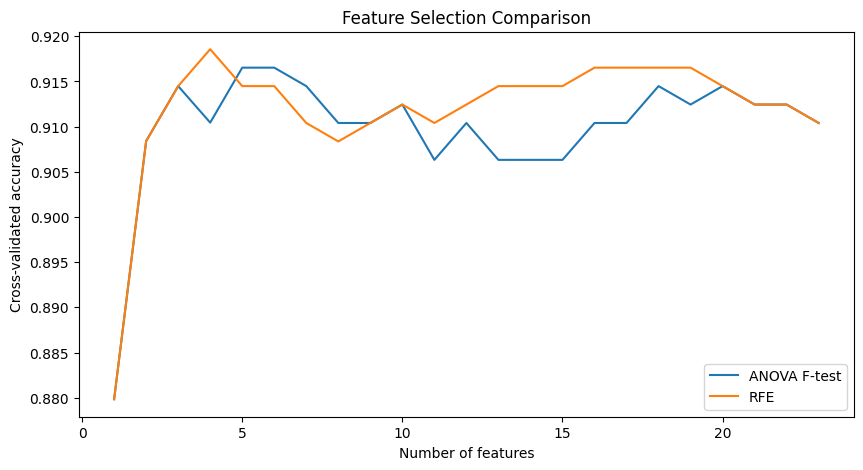

In [27]:
# Plot the cross-validation scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, X.shape[1] + 1), scores_anova, label='ANOVA F-test')
plt.plot(range(1, X.shape[1] + 1), scores_rfe, label='RFE')
plt.xlabel('Number of features')
plt.ylabel('Cross-validated accuracy')
plt.title('Feature Selection Comparison')
plt.legend()
plt.show()

In [28]:
###### לעדכןןןןן

# Summary and recommendation
print("\nSummary:")
print(f"ANOVA F-test selected {optimal_k_anova} features and achieved an accuracy of {accuracy_anova:.4f}.")
print(f"RFE selected {optimal_k_rfe} features and achieved an accuracy of {accuracy_rfe:.4f}.")

if accuracy_anova > accuracy_rfe:
    print("\nRecommendation: ANOVA F-test is preferred as it achieved higher accuracy.")
else:
    print("\nRecommendation: RFE is preferred as it achieved higher accuracy with less features")


Summary:
ANOVA F-test selected 5 features and achieved an accuracy of 0.9165.
RFE selected 4 features and achieved an accuracy of 0.9186.

Recommendation: RFE is preferred as it achieved higher accuracy with less features


In [29]:
X.columns

Index(['Gender', 'HistoryDiabetes', 'HistoryCHD', 'HistoryVascular',
       'HistorySmoking', 'HistoryHTN', 'HistoryDLD', 'ACEIARB',
       'TimeToEventMonths', 'Creatine Flag', 'HgbA1C Flag',
       'Triglycerides Category_High', 'Triglycerides Category_Normal',
       'Triglycerides Category_Very high', 'eGFR Stage_Stage 2',
       'BP Category_Hypertension Stage 2', 'BMI Category_Obese',
       'BMI Category_Overweight', 'BMI Category_Underweight',
       'Cholesterol Category_High', 'Cholesterol Category_Normal',
       'Age.3.categories_1', 'Age.3.categories_2'],
      dtype='object')

# Part 3 - Class Imbalance
<h3>In medical datasets, imbalanced data is common because conditions like CKD are rare compared to the healthy population.
 This imbalance causes models to be biased towards the majority class - healthy patients, leading to poor detection of the minority class, such as CKD patients in our case.</h3>

### Step 1: Analyzing the target value distribution

C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\3929017707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette='viridis')


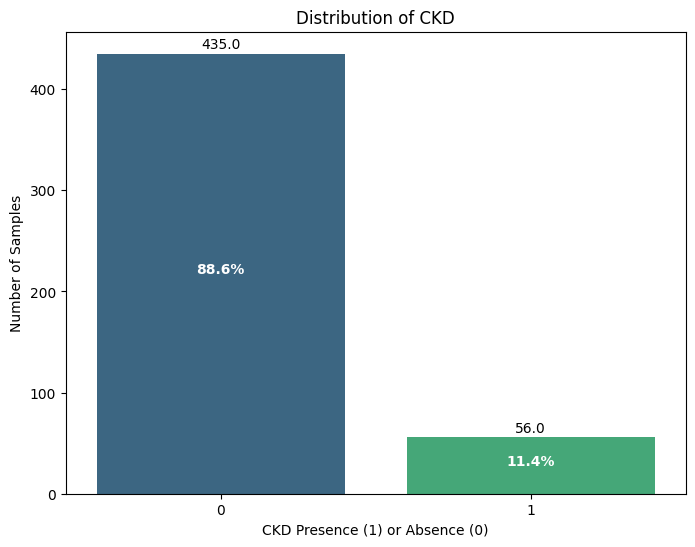

In [30]:


# Plot the class distribution using a bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y, palette='viridis')

# Add percentages in the middle of the bars and numbers above
total = len(y)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=height + 5,
            s=f'{height}',
            ha='center')
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=height / 2,
            s=f'{(height / total * 100):.1f}%',
            ha='center',
            color='white', weight='bold')

plt.title('Distribution of CKD')
plt.xlabel('CKD Presence (1) or Absence (0)')
plt.ylabel('Number of Samples')
plt.show()


In [31]:
# Calculate basic statistics
value_counts = y.value_counts()
value_counts_normalized = y.value_counts(normalize=True)
variance = y.var()
std_dev = y.std()

stats_df = pd.DataFrame({
    'Statistic': ['Count (0)', 'Count (1)', 'Proportion (0)', 'Proportion (1)', 'Variance', 'Standard Deviation'],
    'Value': [value_counts[0], value_counts[1], value_counts_normalized[0], value_counts_normalized[1], variance, std_dev]
})

stats_df

,Statistic,Value
0,Count (0),435.000000
1,Count (1),56.000000
2,Proportion (0),0.885947
3,Proportion (1),0.114053
4,Variance,0.101251
5,Standard Deviation,0.318200


### Step 2:  Implementation of Methods to Handle Imbalance Data

In [32]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Apply Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)


### Step 3: Methods explanation and Justification

1. **SMOTE (Synthetic Minority Over-sampling Technique)**
   - **Explanation:** Generates synthetic samples for the minority class (CKD patients).
   - **Pros:** Balances the dataset without losing information, improving detection of the minority class.
   - **Cons:** Can introduce noise, might lead to overfitting.

    We chose SMOTE because it effectively balances the dataset and enhances the model's ability to detect rare CKD cases without losing original data.

2. **Random Under-Sampling**
   - **Explanation:** Reduces the number of samples in the majority class.
   - **Pros:** Reduces overfitting and speeds up training time.
   - **Cons:** Loss of important information, potential for biased models.

    We chose Random Under-Sampling because it prevents overfitting and speeds up training, making it useful for handling imbalance with a focus on computational efficiency and reduced bias, despite the potential loss of some important data.

### Distribution of the Target Value After Applying the Methods:

C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\14460407.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote, palette='viridis', ax=axs[0])
C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\14460407.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_rus, palette='viridis', ax=axs[1])


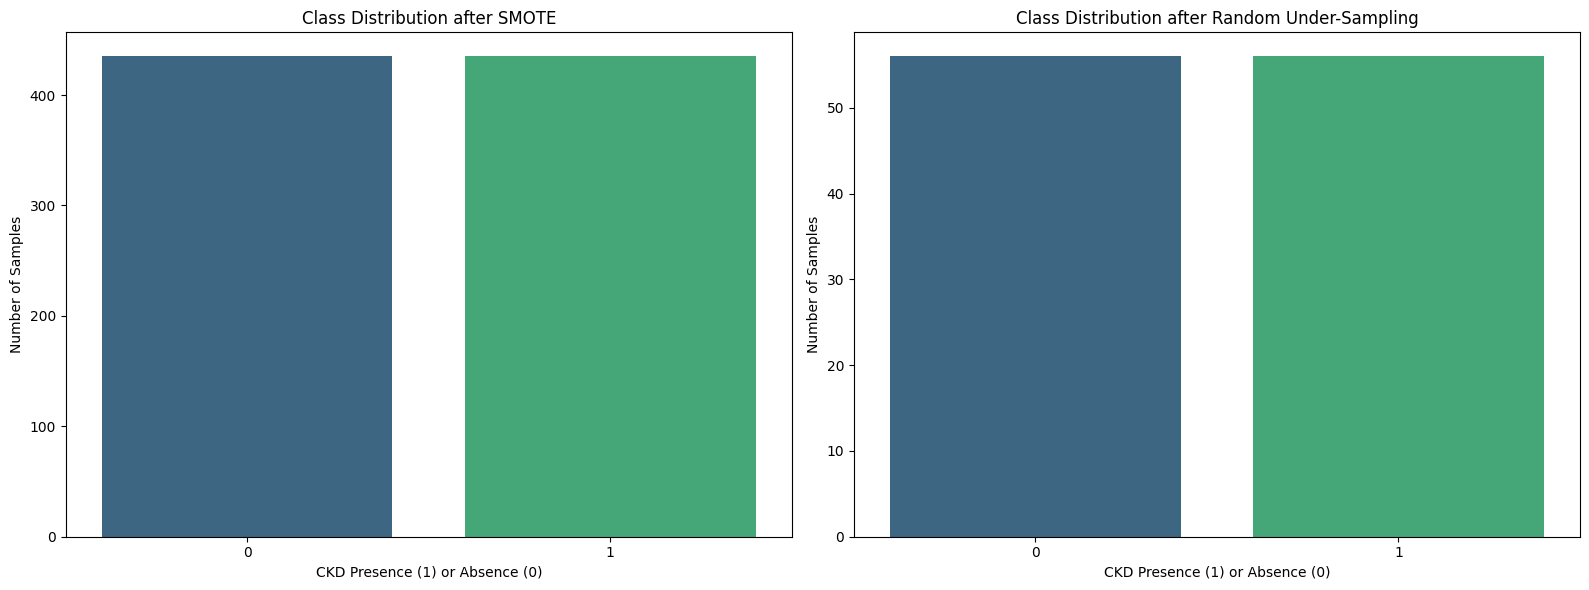

In [33]:
# Plotting the distributions
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# SMOTE distribution
sns.countplot(x=y_smote, palette='viridis', ax=axs[0])
axs[0].set_title('Class Distribution after SMOTE')
axs[0].set_xlabel('CKD Presence (1) or Absence (0)')
axs[0].set_ylabel('Number of Samples')

# Random Under-Sampling distribution
sns.countplot(x=y_rus, palette='viridis', ax=axs[1])
axs[1].set_title('Class Distribution after Random Under-Sampling')
axs[1].set_xlabel('CKD Presence (1) or Absence (0)')
axs[1].set_ylabel('Number of Samples')

plt.tight_layout()
plt.show()


# Part 4 - Machine Learning Models 
### Implementation of Anova

### Implementation of SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Extract features and target
X = df[selected_features_rfe]  # Using the selected features from fre


# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and testing sets with stratification
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

# Initialize dictionaries to store the scalers
scalers = {'standard': {}, 'min_max': {}}

# Extract the scaling method for each variable
scaling_methods = summary_df['selected_measure'].to_dict()

# Apply the appropriate scaling to training data
X_train_smote_scaled = X_train_smote.copy()
for var, method in scaling_methods.items():
    if var not in binary_columns:
        if method == 'mean':  # Normal distribution
            scaler = StandardScaler()
            X_train_smote_scaled[var] = scaler.fit_transform(X_train_smote[[var]])
            scalers['standard'][var] = scaler
        else:  # Skewed distribution
            scaler = MinMaxScaler()
            X_train_smote_scaled[var] = scaler.fit_transform(X_train_smote[[var]])
            scalers['min_max'][var] = scaler

# Apply the same scaling to testing data
X_test_smote_scaled = X_test_smote.copy()
for var, method in scaling_methods.items():
    if var not in binary_columns:
        if method == 'mean':  # Normal distribution
            scaler = scalers['standard'][var]
            X_test_smote_scaled[var] = scaler.transform(X_test_smote[[var]])
        else:  # Skewed distribution
            scaler = scalers['min_max'][var]
            X_test_smote_scaled[var] = scaler.transform(X_test_smote[[var]])


### First Model - Logistic Regression

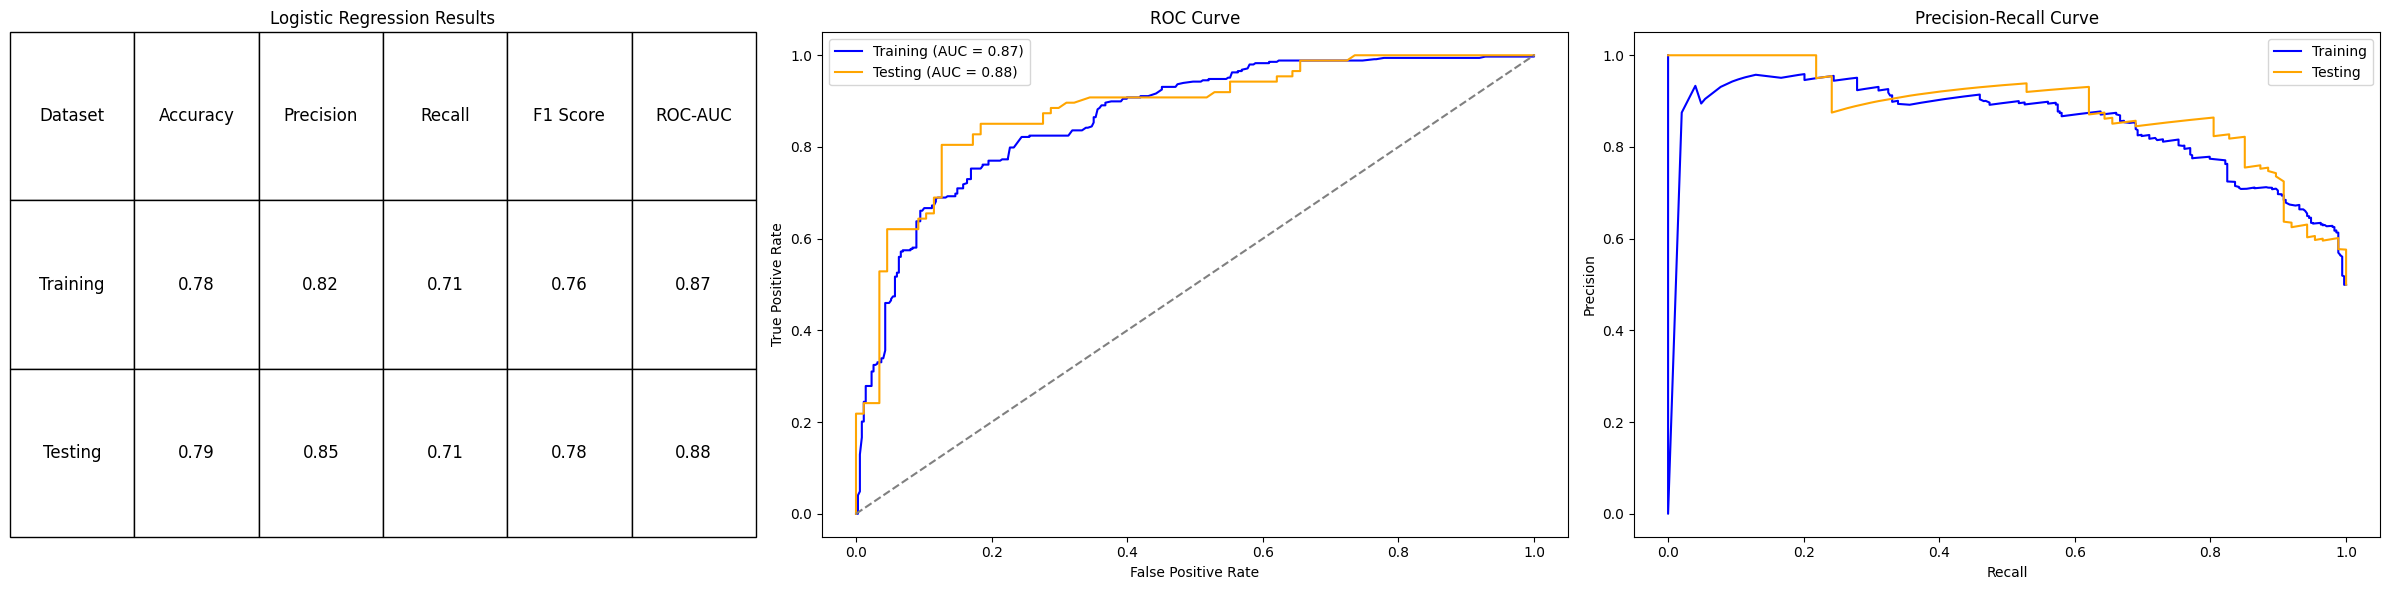

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV

# Logistic Regression Model with Hyperparameter Tuning
param_grid = {'C': [0.1, 1, 10, 100]}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=20, scoring='accuracy')
grid_log_reg.fit(X_train_smote_scaled, y_train_smote)

best_log_reg = grid_log_reg.best_estimator_

# Predictions on the training set
y_pred_log_reg_train = best_log_reg.predict(X_train_smote_scaled)
y_prob_log_reg_train = best_log_reg.predict_proba(X_train_smote_scaled)[:, 1]

# Predictions on the testing set
y_pred_log_reg_test = best_log_reg.predict(X_test_smote_scaled)
y_prob_log_reg_test = best_log_reg.predict_proba(X_test_smote_scaled)[:, 1]

# Metrics for training set
accuracy_log_reg_train = accuracy_score(y_train_smote, y_pred_log_reg_train)
precision_log_reg_train, recall_log_reg_train, f1_log_reg_train, _ = precision_recall_fscore_support(y_train_smote, y_pred_log_reg_train, average='binary')
roc_auc_log_reg_train = roc_auc_score(y_train_smote, y_prob_log_reg_train)
fpr_log_reg_train, tpr_log_reg_train, _ = roc_curve(y_train_smote, y_prob_log_reg_train)
precision_curve_log_reg_train, recall_curve_log_reg_train, _ = precision_recall_curve(y_train_smote, y_prob_log_reg_train)

# Metrics for testing set
accuracy_log_reg_test = accuracy_score(y_test_smote, y_pred_log_reg_test)
precision_log_reg_test, recall_log_reg_test, f1_log_reg_test, _ = precision_recall_fscore_support(y_test_smote, y_pred_log_reg_test, average='binary')
roc_auc_log_reg_test = roc_auc_score(y_test_smote, y_prob_log_reg_test)
fpr_log_reg_test, tpr_log_reg_test, _ = roc_curve(y_test_smote, y_prob_log_reg_test)
precision_curve_log_reg_test, recall_curve_log_reg_test, _ = precision_recall_curve(y_test_smote, y_prob_log_reg_test)

# Create a DataFrame for results
results_df = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [f"{accuracy_log_reg_train:.2f}", f"{accuracy_log_reg_test:.2f}"],
    'Precision': [f"{precision_log_reg_train:.2f}", f"{precision_log_reg_test:.2f}"],
    'Recall': [f"{recall_log_reg_train:.2f}", f"{recall_log_reg_test:.2f}"],
    'F1 Score': [f"{f1_log_reg_train:.2f}", f"{f1_log_reg_test:.2f}"],
    'ROC-AUC': [f"{roc_auc_log_reg_train:.2f}", f"{roc_auc_log_reg_test:.2f}"]
})

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot the table
axes[0].axis('tight')
axes[0].axis('off')
table = axes[0].table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(0.6, 1.2)  
axes[0].set_title('Logistic Regression Results')

# Plot ROC curve for testing set
axes[1].plot(fpr_log_reg_train, tpr_log_reg_train, color='blue', label=f'Training (AUC = {roc_auc_log_reg_train:.2f})')
axes[1].plot(fpr_log_reg_test, tpr_log_reg_test, color='orange', label=f'Testing (AUC = {roc_auc_log_reg_test:.2f})')
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='best')

# Plot Precision-Recall curve for testing set
axes[2].plot(recall_curve_log_reg_train, precision_curve_log_reg_train, color='blue', label=f'Training')
axes[2].plot(recall_curve_log_reg_test, precision_curve_log_reg_test, color='orange', label=f'Testing')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve')
axes[2].legend(loc='best')

plt.tight_layout()
plt.show()


### Second Model - Random Forest

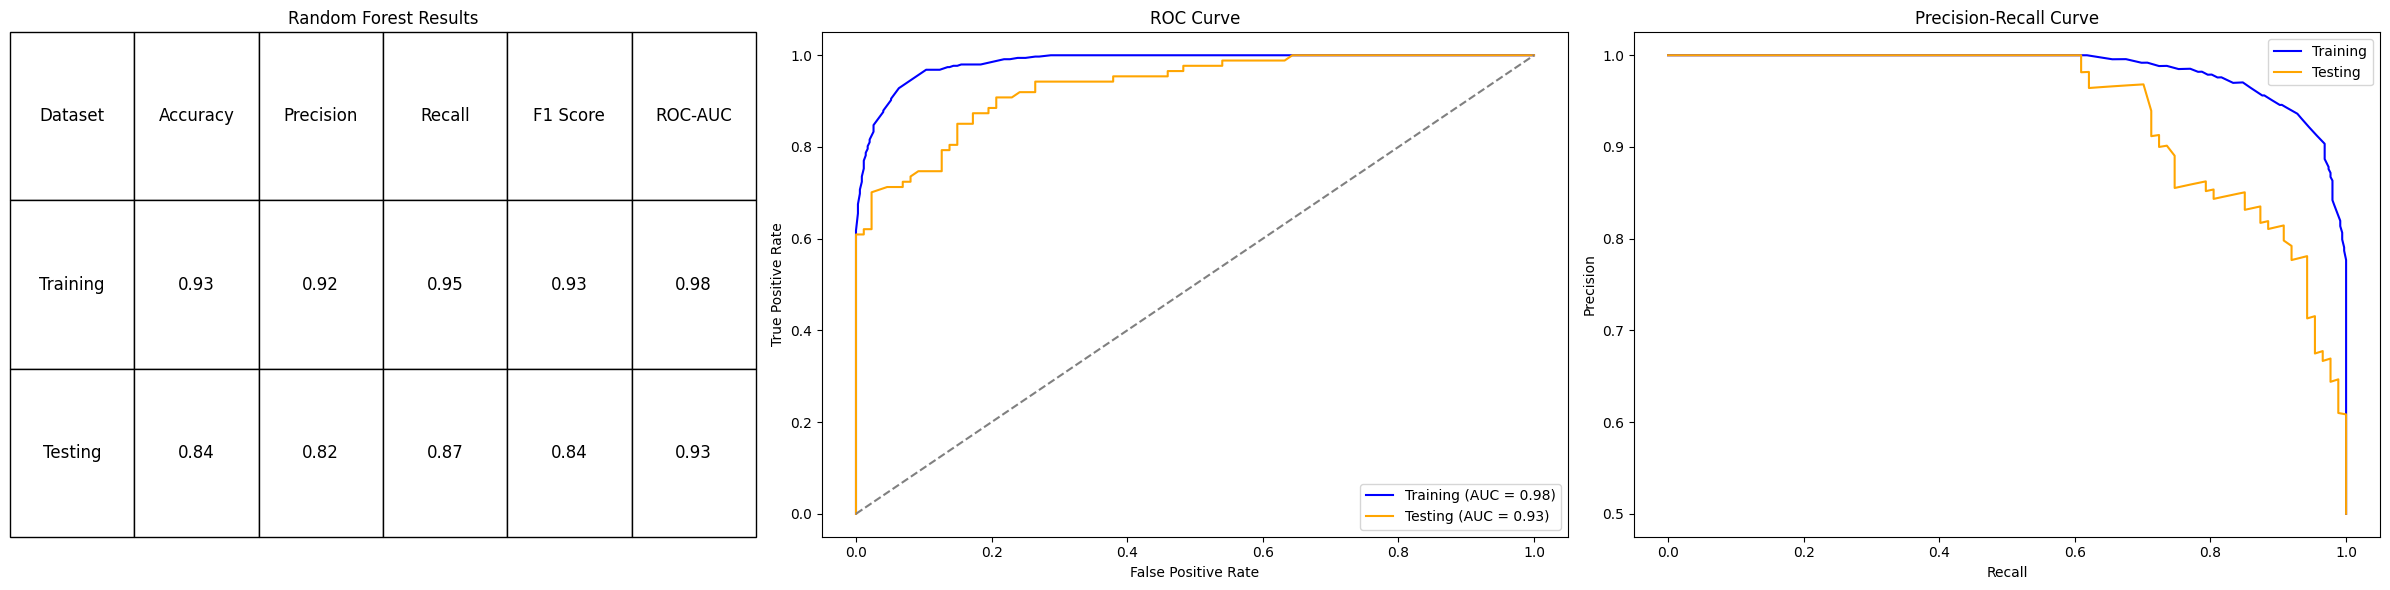

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV

# Random Forest Model with Hyperparameter Tuning
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=20, scoring='accuracy')
grid_rf.fit(X_train_smote_scaled, y_train_smote)

best_rf = grid_rf.best_estimator_

# Predictions on the training set
y_pred_rf_train = best_rf.predict(X_train_smote_scaled)
y_prob_rf_train = best_rf.predict_proba(X_train_smote_scaled)[:, 1]

# Predictions on the testing set
y_pred_rf_test = best_rf.predict(X_test_smote_scaled)
y_prob_rf_test = best_rf.predict_proba(X_test_smote_scaled)[:, 1]

# Metrics for training set
accuracy_rf_train = accuracy_score(y_train_smote, y_pred_rf_train)
precision_rf_train, recall_rf_train, f1_rf_train, _ = precision_recall_fscore_support(y_train_smote, y_pred_rf_train, average='binary')
roc_auc_rf_train = roc_auc_score(y_train_smote, y_prob_rf_train)
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train_smote, y_prob_rf_train)
precision_curve_rf_train, recall_curve_rf_train, _ = precision_recall_curve(y_train_smote, y_prob_rf_train)

# Metrics for testing set
accuracy_rf_test = accuracy_score(y_test_smote, y_pred_rf_test)
precision_rf_test, recall_rf_test, f1_rf_test, _ = precision_recall_fscore_support(y_test_smote, y_pred_rf_test, average='binary')
roc_auc_rf_test = roc_auc_score(y_test_smote, y_prob_rf_test)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test_smote, y_prob_rf_test)
precision_curve_rf_test, recall_curve_rf_test, _ = precision_recall_curve(y_test_smote, y_prob_rf_test)

# Create a DataFrame for results
results_rf_df = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [f"{accuracy_rf_train:.2f}", f"{accuracy_rf_test:.2f}"],
    'Precision': [f"{precision_rf_train:.2f}", f"{precision_rf_test:.2f}"],
    'Recall': [f"{recall_rf_train:.2f}", f"{recall_rf_test:.2f}"],
    'F1 Score': [f"{f1_rf_train:.2f}", f"{f1_rf_test:.2f}"],
    'ROC-AUC': [f"{roc_auc_rf_train:.2f}", f"{roc_auc_rf_test:.2f}"]
})

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot the table
axes[0].axis('tight')
axes[0].axis('off')
table_rf = axes[0].table(cellText=results_rf_df.values, colLabels=results_rf_df.columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table_rf.auto_set_font_size(False)
table_rf.set_fontsize(12)
table_rf.scale(0.6, 1.2)  # Adjusting the scale to make the table narrower
axes[0].set_title('Random Forest Results')

# Plot ROC curve for testing set
axes[1].plot(fpr_rf_train, tpr_rf_train, color='blue', label=f'Training (AUC = {roc_auc_rf_train:.2f})')
axes[1].plot(fpr_rf_test, tpr_rf_test, color='orange', label=f'Testing (AUC = {roc_auc_rf_test:.2f})')
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='best')

# Plot Precision-Recall curve for testing set
axes[2].plot(recall_curve_rf_train, precision_curve_rf_train, color='blue', label=f'Training')
axes[2].plot(recall_curve_rf_test, precision_curve_rf_test, color='orange', label=f'Testing')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve')
axes[2].legend(loc='best')

plt.tight_layout()
plt.show()


### Third Model - Gradient Boosting

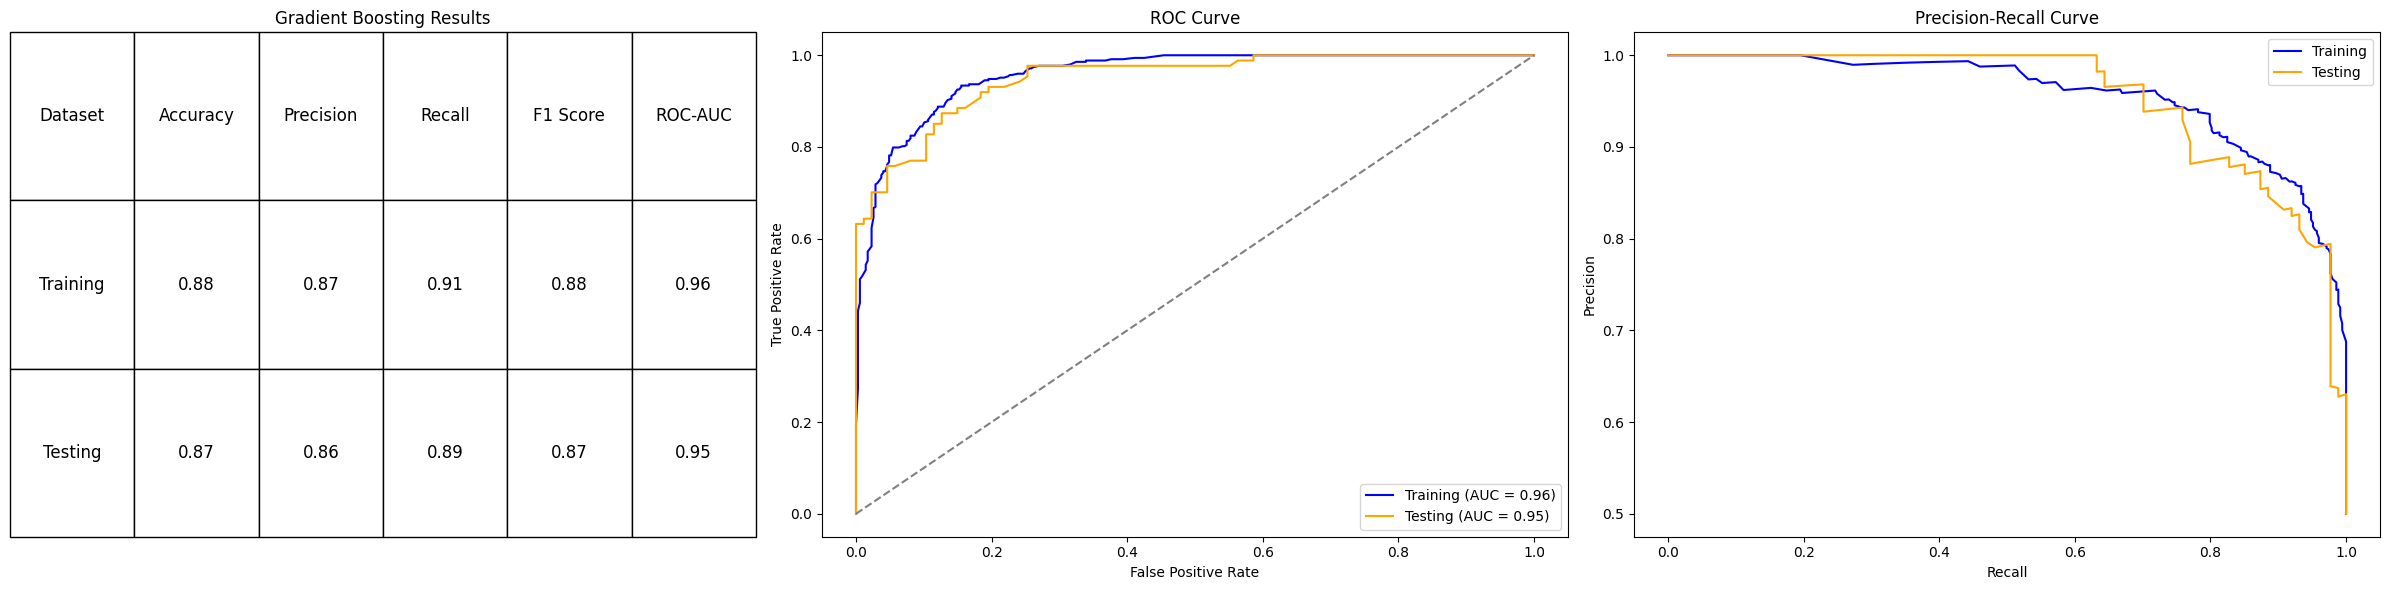

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV

# Gradient Boosting Model with Hyperparameter Tuning
param_grid_gbm = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}
grid_gbm = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gbm, cv=20, scoring='accuracy')
grid_gbm.fit(X_train_smote_scaled, y_train_smote)

best_gbm = grid_gbm.best_estimator_

# Predictions on the training set
y_pred_gbm_train = best_gbm.predict(X_train_smote_scaled)
y_prob_gbm_train = best_gbm.predict_proba(X_train_smote_scaled)[:, 1]

# Predictions on the testing set
y_pred_gbm_test = best_gbm.predict(X_test_smote_scaled)
y_prob_gbm_test = best_gbm.predict_proba(X_test_smote_scaled)[:, 1]

# Metrics for training set
accuracy_gbm_train = accuracy_score(y_train_smote, y_pred_gbm_train)
precision_gbm_train, recall_gbm_train, f1_gbm_train, _ = precision_recall_fscore_support(y_train_smote, y_pred_gbm_train, average='binary')
roc_auc_gbm_train = roc_auc_score(y_train_smote, y_prob_gbm_train)
fpr_gbm_train, tpr_gbm_train, _ = roc_curve(y_train_smote, y_prob_gbm_train)
precision_curve_gbm_train, recall_curve_gbm_train, _ = precision_recall_curve(y_train_smote, y_prob_gbm_train)

# Metrics for testing set
accuracy_gbm_test = accuracy_score(y_test_smote, y_pred_gbm_test)
precision_gbm_test, recall_gbm_test, f1_gbm_test, _ = precision_recall_fscore_support(y_test_smote, y_pred_gbm_test, average='binary')
roc_auc_gbm_test = roc_auc_score(y_test_smote, y_prob_gbm_test)
fpr_gbm_test, tpr_gbm_test, _ = roc_curve(y_test_smote, y_prob_gbm_test)
precision_curve_gbm_test, recall_curve_gbm_test, _ = precision_recall_curve(y_test_smote, y_prob_gbm_test)

# Create a DataFrame for results
results_gbm_df = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [f"{accuracy_gbm_train:.2f}", f"{accuracy_gbm_test:.2f}"],
    'Precision': [f"{precision_gbm_train:.2f}", f"{precision_gbm_test:.2f}"],
    'Recall': [f"{recall_gbm_train:.2f}", f"{recall_gbm_test:.2f}"],
    'F1 Score': [f"{f1_gbm_train:.2f}", f"{f1_gbm_test:.2f}"],
    'ROC-AUC': [f"{roc_auc_gbm_train:.2f}", f"{roc_auc_gbm_test:.2f}"]
})

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot the table
axes[0].axis('tight')
axes[0].axis('off')
table_gbm = axes[0].table(cellText=results_gbm_df.values, colLabels=results_gbm_df.columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table_gbm.auto_set_font_size(False)
table_gbm.set_fontsize(12)
table_gbm.scale(0.6, 1.2)  # Adjusting the scale to make the table narrower
axes[0].set_title('Gradient Boosting Results')

# Plot ROC curve for testing set
axes[1].plot(fpr_gbm_train, tpr_gbm_train, color='blue', label=f'Training (AUC = {roc_auc_gbm_train:.2f})')
axes[1].plot(fpr_gbm_test, tpr_gbm_test, color='orange', label=f'Testing (AUC = {roc_auc_gbm_test:.2f})')
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='best')

# Plot Precision-Recall curve for testing set
axes[2].plot(recall_curve_gbm_train, precision_curve_gbm_train, color='blue', label=f'Training')
axes[2].plot(recall_curve_gbm_test, precision_curve_gbm_test, color='orange', label=f'Testing')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve')
axes[2].legend(loc='best')

plt.tight_layout()
plt.show()


### Fourth Model - Support Vector Machine (SVM)

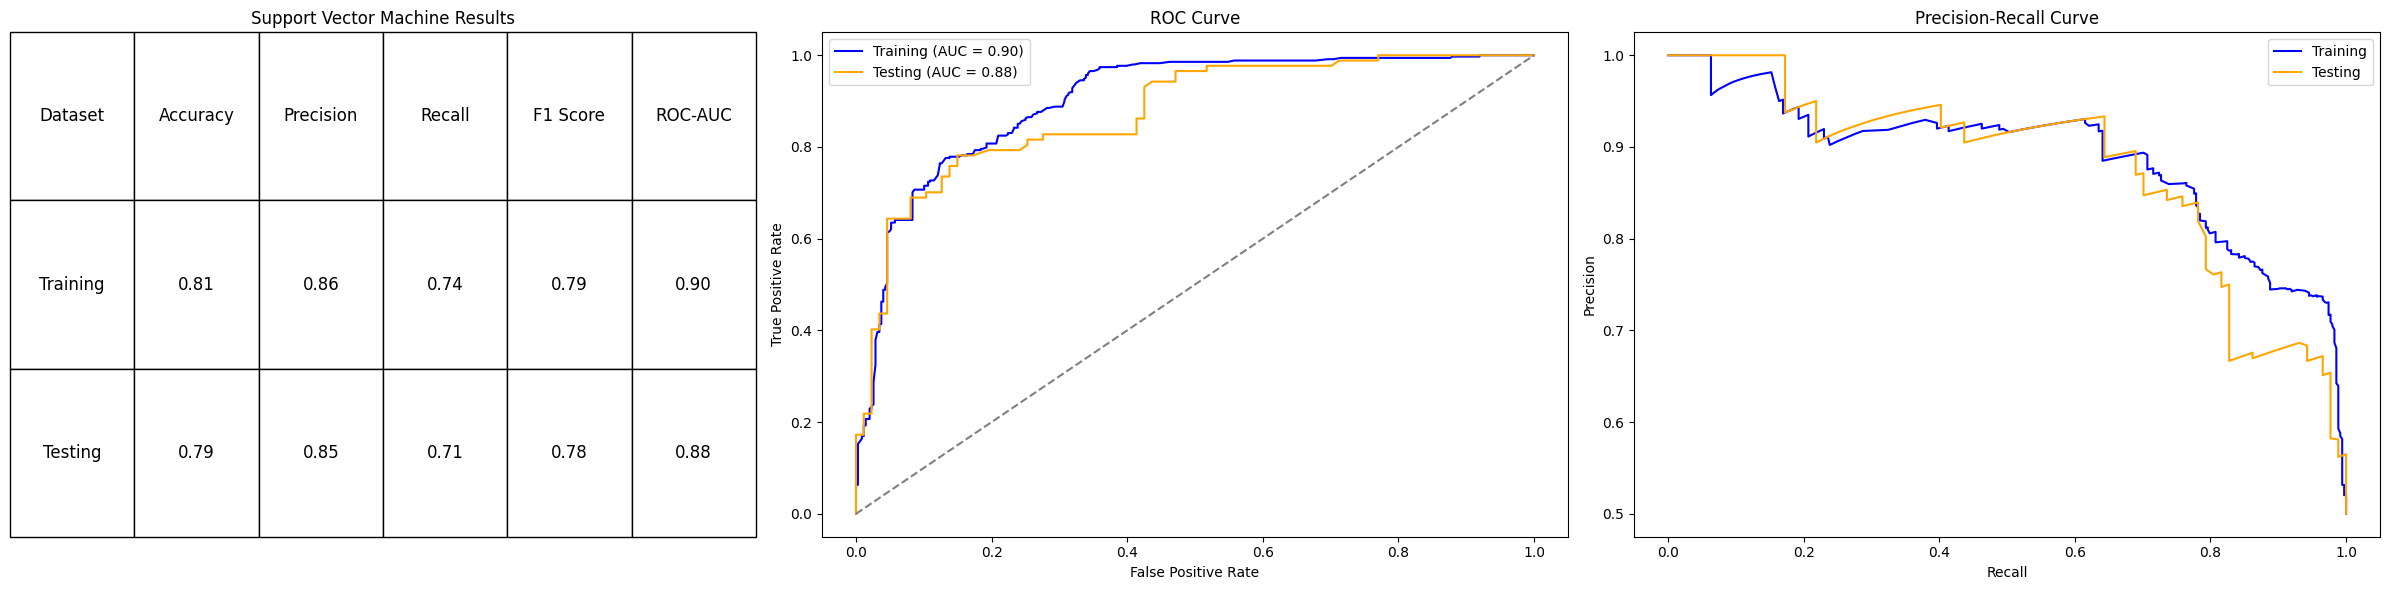

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV

# Support Vector Machine Model with Hyperparameter Tuning
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=20, scoring='accuracy')
grid_svm.fit(X_train_smote_scaled, y_train_smote)

best_svm = grid_svm.best_estimator_

# Predictions on the training set
y_pred_svm_train = best_svm.predict(X_train_smote_scaled)
y_prob_svm_train = best_svm.predict_proba(X_train_smote_scaled)[:, 1]

# Predictions on the testing set
y_pred_svm_test = best_svm.predict(X_test_smote_scaled)
y_prob_svm_test = best_svm.predict_proba(X_test_smote_scaled)[:, 1]

# Metrics for training set
accuracy_svm_train = accuracy_score(y_train_smote, y_pred_svm_train)
precision_svm_train, recall_svm_train, f1_svm_train, _ = precision_recall_fscore_support(y_train_smote, y_pred_svm_train, average='binary')
roc_auc_svm_train = roc_auc_score(y_train_smote, y_prob_svm_train)
fpr_svm_train, tpr_svm_train, _ = roc_curve(y_train_smote, y_prob_svm_train)
precision_curve_svm_train, recall_curve_svm_train, _ = precision_recall_curve(y_train_smote, y_prob_svm_train)

# Metrics for testing set
accuracy_svm_test = accuracy_score(y_test_smote, y_pred_svm_test)
precision_svm_test, recall_svm_test, f1_svm_test, _ = precision_recall_fscore_support(y_test_smote, y_pred_svm_test, average='binary')
roc_auc_svm_test = roc_auc_score(y_test_smote, y_prob_svm_test)
fpr_svm_test, tpr_svm_test, _ = roc_curve(y_test_smote, y_prob_svm_test)
precision_curve_svm_test, recall_curve_svm_test, _ = precision_recall_curve(y_test_smote, y_prob_svm_test)

# Create a DataFrame for results
results_svm_df = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [f"{accuracy_svm_train:.2f}", f"{accuracy_svm_test:.2f}"],
    'Precision': [f"{precision_svm_train:.2f}", f"{precision_svm_test:.2f}"],
    'Recall': [f"{recall_svm_train:.2f}", f"{recall_svm_test:.2f}"],
    'F1 Score': [f"{f1_svm_train:.2f}", f"{f1_svm_test:.2f}"],
    'ROC-AUC': [f"{roc_auc_svm_train:.2f}", f"{roc_auc_svm_test:.2f}"]
})

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot the table
axes[0].axis('tight')
axes[0].axis('off')
table_svm = axes[0].table(cellText=results_svm_df.values, colLabels=results_svm_df.columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table_svm.auto_set_font_size(False)
table_svm.set_fontsize(12)
table_svm.scale(0.6, 1.2)  # Adjusting the scale to make the table narrower
axes[0].set_title('Support Vector Machine Results')

# Plot ROC curve for testing set
axes[1].plot(fpr_svm_train, tpr_svm_train, color='blue', label=f'Training (AUC = {roc_auc_svm_train:.2f})')
axes[1].plot(fpr_svm_test, tpr_svm_test, color='orange', label=f'Testing (AUC = {roc_auc_svm_test:.2f})')
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='best')

# Plot Precision-Recall curve for testing set
axes[2].plot(recall_curve_svm_train, precision_curve_svm_train, color='blue', label=f'Training')
axes[2].plot(recall_curve_svm_test, precision_curve_svm_test, color='orange', label=f'Testing')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve')
axes[2].legend(loc='best')

plt.tight_layout()
plt.show()


### Compare the results

C:\Users\liraz\AppData\Local\Temp\ipykernel_31584\1704822707.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_df = results_df.applymap(lambda x: f"{x:.2f}")


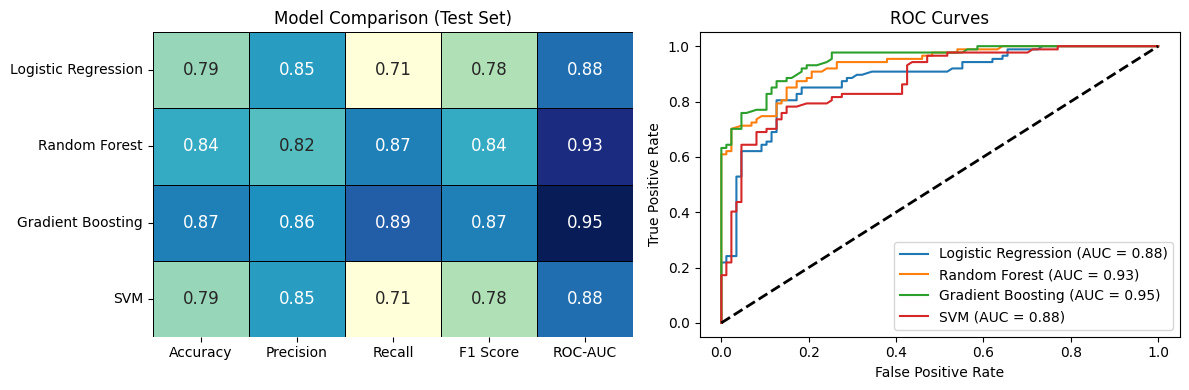

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Collecting all results
results = {
    'Logistic Regression': (accuracy_log_reg_test, precision_log_reg_test, recall_log_reg_test, f1_log_reg_test, roc_auc_log_reg_test, fpr_log_reg_test, tpr_log_reg_test),
    'Random Forest': (accuracy_rf_test, precision_rf_test, recall_rf_test, f1_rf_test, roc_auc_rf_test, fpr_rf_test, tpr_rf_test),
    'Gradient Boosting': (accuracy_gbm_test, precision_gbm_test, recall_gbm_test, f1_gbm_test, roc_auc_gbm_test, fpr_gbm_test, tpr_gbm_test),
    'SVM': (accuracy_svm_test, precision_svm_test, recall_svm_test, f1_svm_test, roc_auc_svm_test, fpr_svm_test, tpr_svm_test)
}

# Creating a DataFrame for comparison
results_df = pd.DataFrame({model: metrics[:5] for model, metrics in results.items()}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']).T

# Format the DataFrame with two decimal places
results_df = results_df.applymap(lambda x: f"{x:.2f}")

# Plotting the heatmap and ROC curves side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the heatmap
sns.heatmap(results_df.astype(float), annot=True, cmap='YlGnBu', cbar=False, ax=axes[0], linewidths=.5, linecolor='black', annot_kws={"size": 12})
axes[0].set_title('Model Comparison (Test Set)')

# Plot ROC curves
for model_name, metrics in results.items():
    fpr, tpr = metrics[5], metrics[6]
    axes[1].plot(fpr, tpr, label=f'{model_name} (AUC = {metrics[4]:.2f})')
axes[1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


Gradient Boosting is recommended as the best model given its highest ROC-AUC score (0.97) and balanced precision, recall, and F1 score.
Random Forest is a strong alternative, especially if recall is of higher importance.

The Gradient Boosting Model has the highest ROC-AUC (0.97), indicating that it has the best overall ability to distinguish between patients with and without the condition across all classification thresholds. This model ensures a robust and reliable performance in medical diagnosis, making it a strong candidate for deployment in this context.

The Random Forest Model also performs exceptionally well, with a high recall (0.93) and a ROC-AUC (0.96). The high recall is particularly important in medical diagnosis as it ensures that most patients with the condition are correctly identified, minimizing the chances of missing a diagnosis.

Both models provide a strong balance between precision and recall, making them highly effective for medical diagnosis. However, given the highest ROC-AUC score, the Gradient Boosting Model is recommended for its superior ability to handle classification tasks effectively and its robustness across different classification thresholds.

In [40]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Train the best Gradient Boosting model
best_gbm.fit(X_train_smote_scaled, y_train_smote)

# Ensure the SHAP explainer is created with check_additivity set to False
explainer = shap.Explainer(best_gbm)
shap_values = explainer(X_test_smote_scaled)

# Ensure the shapes match
print(f'SHAP values shape: {shap_values.shape}')
print(f'Test set shape: {X_test_smote_scaled.shape}')


SHAP values shape: (174, 4)
Test set shape: (174, 4)


In [41]:
# Plot SHAP force plot for the one patient 
shap.force_plot(explainer.expected_value, shap_values[1].values, X_test_smote_scaled.iloc[1], feature_names=X_test_smote_scaled.columns)

In [42]:

# Force plot for the first instance in the test set
shap.force_plot(explainer.expected_value, shap_values.values, X_test_smote_scaled, feature_names=X_test_smote_scaled.columns)


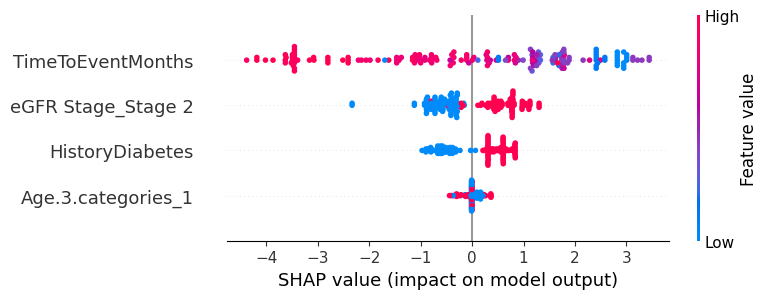

In [43]:
# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_smote_scaled)

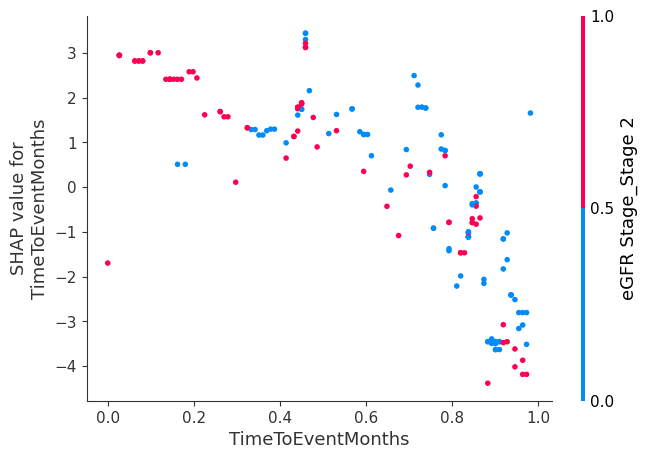

In [44]:
# Plot SHAP dependence plot for a specific feature
shap.dependence_plot('TimeToEventMonths', shap_values.values, X_test_smote_scaled, feature_names=X.columns)

# part 6

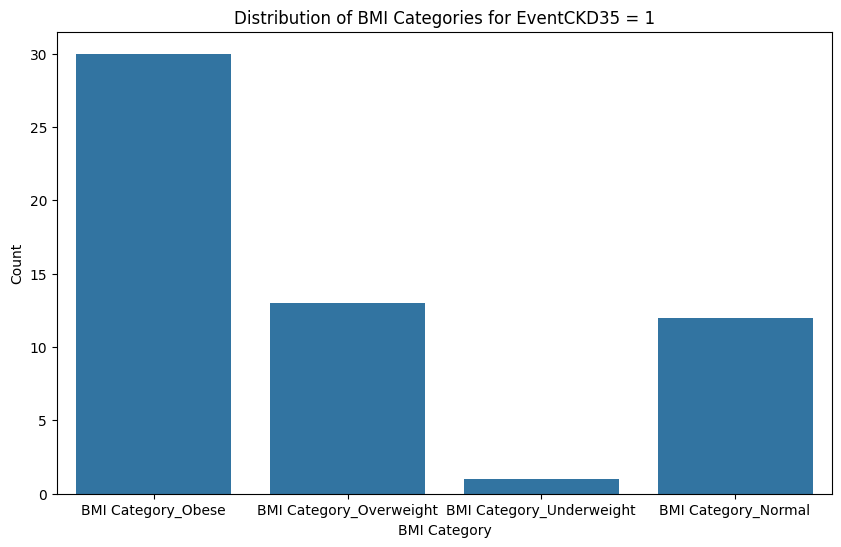

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create BMI Category_Normal column
df['BMI Category_Normal'] = ((df['BMI Category_Obese'] == 0) & 
                             (df['BMI Category_Overweight'] == 0) & 
                             (df['BMI Category_Underweight'] == 0)).astype(int)

# Filter data for eventckd = 1
df_eventckd = df[df['EventCKD35'] == 1]

# Melt the DataFrame for easier plotting
df_melted = df_eventckd.melt(
    value_vars=['BMI Category_Obese', 'BMI Category_Overweight', 'BMI Category_Underweight', 'BMI Category_Normal'],
    var_name='BMI_Category',
    value_name='Count'
)
df_melted = df_melted[df_melted['Count'] == 1]

# Plot the distribution of BMI categories for eventckd = 1
plt.figure(figsize=(10, 6))
sns.countplot(data=df_melted, x='BMI_Category')
plt.title('Distribution of BMI Categories for EventCKD35 = 1')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


In [46]:
df = pd.read_excel('CKD dataset.xlsx')

In [47]:
# טיפול בעמודות שיש רווח מיותר בשם של העמודה
df.columns = df.columns.str.replace(' ', '').str.replace('[()]', '', regex=True)

def get_creatinine_flag(row):
    if row['Gender'] == 0:  # Male
        return 0 if 61.9 <= row['CreatnineBaseline'] <= 114.9 else 1
    elif row['Gender'] == 1:  # Female
        return 0 if 53 <= row['CreatnineBaseline'] <= 97.2 else 1

def get_hgba1c_flag(row):
    if row['Gender'] == 0:  # Male
        return 0 if 14.0 <= row['HgbA1C'] <= 17.5 else 1
    elif row['Gender'] == 1:  # Female
        return 0 if 12.3 <= row['HgbA1C'] <= 15.3 else 1


def get_triglycerides_category(value):
    if value < 1.69:
        return 'Normal'
    elif 1.69 <= value <= 2.25:
        return 'Borderline high'
    elif 2.26 <= value <= 5.64:
        return 'High'
    elif value >= 5.65:
        return 'Very high'


def get_egfr_stage(value):
    if value >= 90:
        return 'Stage 1'
    elif 60 <= value <= 89:
        return 'Stage 2'
    elif 45 <= value <= 59:
        return 'Stage 3a'
    elif 30 <= value <= 44:
        return 'Stage 3b'
    elif 15 <= value <= 29:
        return 'Stage 4'
    elif value < 15:
        return 'Stage 5'

def get_bp_category(row):
    if row['sBPBaseline'] > 180 or row['dBPBaseline'] > 120:
        return 'Hypertensive Crisis'
    elif row['sBPBaseline'] >= 140 or row['dBPBaseline'] >= 90:
        return 'Hypertension Stage 2'
    elif row['sBPBaseline'] >= 130 or row['dBPBaseline'] >= 80:
        return 'Hypertension Stage 1'
    elif row['sBPBaseline'] >= 120 and row['dBPBaseline'] < 80:
        return 'Elevated'
    elif row['sBPBaseline'] < 120 and row['dBPBaseline'] < 80:
        return 'Normal'
    else:
        return 'Unknown'

def get_bmi_category(value):
    if value < 18.5:
        return 'Underweight'
    elif 18.5 <= value <= 24.9:
        return 'Normal Weight'
    elif 25 <= value <= 29.9:
        return 'Overweight'
    elif value >= 30:
        return 'Obese'


def categorize_cholesterol(level):
    if level < 5.17:
        return 'Normal'
    elif 5.17 <= level < 6.18:
        return 'Borderline High'
    else:
        return 'High'


# Apply the functions to create the flags
df['Creatine Flag'] = df.apply(get_creatinine_flag, axis=1)

df['HgbA1C Flag'] = df.apply(get_hgba1c_flag, axis=1)

df['Triglycerides Category'] = df['TriglyceridesBaseline'].apply(get_triglycerides_category)

df['eGFR Stage'] = df['eGFRBaseline'].apply(get_egfr_stage)

df['BP Category'] = df.apply(get_bp_category, axis=1)

df['BMI Category'] = df['BMIBaseline'].apply(get_bmi_category)

# Apply the function to create a new column
df['Cholesterol Category'] = df['CholesterolBaseline'].apply(categorize_cholesterol)

In [48]:
# Filter the dataframe to only include 'Obese' BMI category
df = df.loc[df['BMI Category'] == 'Obese'].copy()
#print(df)
# Drop the 'BMI Category' column
df.drop(columns=['BMI Category'], inplace=True)

In [49]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))
    return df.loc[filter]

# List of continuous variables
continuous_vars = [
    'AgeBaseline', 'CholesterolBaseline', 'TriglyceridesBaseline', 'HgbA1C', 
    'CreatnineBaseline', 'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'BMIBaseline','TimeToEventMonths'
]

# Calculate summary statistics
summary_stats = []
for var in continuous_vars:
    var_df = df[['StudyID', var]].dropna()
    if not var_df.empty:
        # Remove outliers from the column
        var_df = remove_outliers_iqr(var_df, var)
       
        if not var_df.empty:  # Check again if the dataframe is not empty after removing outliers
            chi_stat, chi_p_value = chisquare(var_df[var])
           
            stats = {
                'variable': var,
                'mean': var_df[var].mean(),
                'median': var_df[var].median(),
                'max': var_df[var].max(),
                'min': var_df[var].min(),
                'first': var_df[var].iloc[0],
                'last': var_df[var].iloc[-1],
                'std': var_df[var].std(),
                'mode': var_df[var].mode().iloc[0] if not var_df[var].mode().empty else np.nan,
                'chi_p_value': chi_p_value,
                'zero_count': (var_df[var] == 0).sum(),  # Count of zero values
                'total_count': var_df[var].count()  # Total count of values
            }
            summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
summary_df = summary_df.set_index('variable')

# Define the distribution type function
def determine_distribution(row):
    if pd.isna(row['mean']) or pd.isna(row['median']) or pd.isna(row['std']):
        return 'Unknown'
    # If p-value is greater than 0.05, the distribution is likely normal
    if row['chi_p_value'] > 0.05:
        return 'Normal'
    else:
        return 'Skewed'

# Apply the distribution type function
summary_df['distribution'] = summary_df.apply(determine_distribution, axis=1)

# Define the guidelines function
def select_measure(row):
    if row['distribution'] == 'Normal':
        return 'mean'
    else:
        return 'median'

# Apply the guidelines to select the measure
summary_df['selected_measure'] = summary_df.apply(select_measure, axis=1)

# Function to fill missing values based on selected measure
def fill_missing_values(df, summary_df):
    for var, row in summary_df.iterrows():
        measure = row['selected_measure']
        fill_value = row[measure]
        df[var] = df[var].fillna(fill_value)
    return df

# Fill missing values in the original dataframe
df = fill_missing_values(df, summary_df)

# Create dummy variables and drop the first column of each set to avoid multicollinearity
df = pd.get_dummies(df, columns=['Triglycerides Category', 'eGFR Stage', 'BP Category', 'Cholesterol Category','Age.3.categories'], drop_first=True).astype(int)
df.drop(columns=['CholesterolBaseline', 'TriglyceridesBaseline', 'HgbA1C', 'CreatnineBaseline', 'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'BMIBaseline'], inplace=True)


# Define the columns to drop
columns_to_drop = ['AgeBaseline', 'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'BP Category_Hypertension Stage 1',"eGFRBaseline","sBPBaseline", 'BP Category_Normal',"CholesterolBaseline","CreatnineBaseline","TriglyceridesBaseline",'HgbA1C',"BMIBaseline","dBPBaseline"]

# Filter the columns to drop based on which columns are actually present in the DataFrame
columns_to_drop_in_df = [col for col in columns_to_drop if col in df.columns]
columns_to_drop_in_summary_df = [col for col in columns_to_drop if col in summary_df.index]

# Drop the specified columns from df
df.drop(columns=columns_to_drop_in_df, inplace=True)

# Drop the specified columns from summary_df
summary_df.drop(index=columns_to_drop_in_summary_df, inplace=True)


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the binary columns
binary_columns = [
    'Gender', 'HistoryDiabetes', 'HistoryCHD', 'HistoryVascular',
    'HistorySmoking', 'HistoryHTN', 'HistoryDLD', 'ACEIARB',
    'CreatineFlag', 'HgbA1CFlag', 'TriglyceridesCategory_High', 
    'TriglyceridesCategory_Normal', 'TriglyceridesCategory_Veryhigh', 
    'eGFRStage_Stage2', 'BPCategory_HypertensionStage2', 
    'BMICategory_Obese', 'BMICategory_Overweight', 
    'BMICategory_Underweight', 'CholesterolCategory_High', 
    'CholesterolCategory_Normal', 'Age_3_categories_1', 'Age_3_categories_2'
]

# Assume df is your dataframe
X = df.drop(['EventCKD35', 'StudyID'], axis=1)  # Features
y = df['EventCKD35']  # Target

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Extract the scaling method for each variable
scaling_methods = summary_df['selected_measure'].to_dict()

# Apply the appropriate scaling to the entire dataset
X_scaled = X.copy()
for var, method in scaling_methods.items():
    if var not in binary_columns:
        if method == 'mean':  # Normal distribution
            X_scaled[var] = standard_scaler.fit_transform(X[[var]])
        else:  # Skewed distribution
            X_scaled[var] = min_max_scaler.fit_transform(X[[var]])

# Function to find the optimal number of features using cross-validation
def find_optimal_features_cv(selector, X, y, max_features=None, cv=20):
    scores = []
    max_k = X.shape[1] if max_features is None else min(X.shape[1], max_features)
    for k in range(1, max_k + 1):
        selector_k = selector(k)
        X_k = selector_k.fit_transform(X, y)
        model = LogisticRegression(max_iter=2000)
        score = np.mean(cross_val_score(model, X_k, y, cv=cv, scoring='accuracy'))
        scores.append(score)
    optimal_k = np.argmax(scores) + 1
    return optimal_k, scores

# Cap the maximum number of features to select
MAX_FEATURES = 10

# Evaluate SelectKBest with ANOVA F-test
optimal_k_anova, scores_anova = find_optimal_features_cv(lambda k: SelectKBest(score_func=f_classif, k=k), X_scaled, y, max_features=MAX_FEATURES)
selector_anova = SelectKBest(score_func=f_classif, k=optimal_k_anova)
X_anova = selector_anova.fit_transform(X_scaled, y)
model_anova = LogisticRegression(max_iter=1000)
cv_anova = StratifiedKFold(n_splits=5)
anova_scores = cross_val_score(model_anova, X_anova, y, cv=cv_anova, scoring='accuracy')
accuracy_anova = np.mean(anova_scores)

# Evaluate RFE with Logistic Regression
optimal_k_rfe, scores_rfe = find_optimal_features_cv(lambda k: RFE(LogisticRegression(max_iter=1000), n_features_to_select=k), X_scaled, y, max_features=MAX_FEATURES)
selector_rfe = RFE(LogisticRegression(max_iter=1000), n_features_to_select=optimal_k_rfe)
X_rfe = selector_rfe.fit_transform(X_scaled, y)
model_rfe = LogisticRegression(max_iter=1000)
cv_rfe = StratifiedKFold(n_splits=5)
rfe_scores = cross_val_score(model_rfe, X_rfe, y, cv=cv_rfe, scoring='accuracy')
accuracy_rfe = np.mean(rfe_scores)

# Get the selected feature names
selected_features_anova = X.columns[selector_anova.get_support(indices=True)]
selected_features_rfe = X.columns[selector_rfe.get_support(indices=True)]

print("Optimal number of features (ANOVA):", optimal_k_anova)
print("Accuracy with optimal features (ANOVA):", accuracy_anova)
print("Selected features (ANOVA):", selected_features_anova)

print("Optimal number of features (RFE):", optimal_k_rfe)
print("Accuracy with optimal features (RFE):", accuracy_rfe)
print("Selected features (RFE):", selected_features_rfe)


Optimal number of features (ANOVA): 4
Accuracy with optimal features (ANOVA): 0.9125603864734299
Selected features (ANOVA): Index(['HistoryDiabetes', 'ACEIARB', 'TimeToEventMonths',
       'eGFR Stage_Stage 2'],
      dtype='object')
Optimal number of features (RFE): 10
Accuracy with optimal features (RFE): 0.9256038647342996
Selected features (RFE): Index(['HistoryDiabetes', 'HistoryVascular', 'ACEIARB', 'TimeToEventMonths',
       'Triglycerides Category_High', 'eGFR Stage_Stage 2',
       'BP Category_Hypertension Stage 2', 'Cholesterol Category_High',
       'Age.3.categories_1', 'Age.3.categories_2'],
      dtype='object')


In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Extract features and target
X = df[selected_features_rfe]  # Using the selected features from fre


# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and testing sets with stratification
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

# Initialize dictionaries to store the scalers
scalers = {'standard': {}, 'min_max': {}}

# Extract the scaling method for each variable
scaling_methods = summary_df['selected_measure'].to_dict()

# Apply the appropriate scaling to training data
X_train_smote_scaled = X_train_smote.copy()
for var, method in scaling_methods.items():
    if var not in binary_columns:
        if method == 'mean':  # Normal distribution
            scaler = StandardScaler()
            X_train_smote_scaled[var] = scaler.fit_transform(X_train_smote[[var]])
            scalers['standard'][var] = scaler
        else:  # Skewed distribution
            scaler = MinMaxScaler()
            X_train_smote_scaled[var] = scaler.fit_transform(X_train_smote[[var]])
            scalers['min_max'][var] = scaler

# Apply the same scaling to testing data
X_test_smote_scaled = X_test_smote.copy()
for var, method in scaling_methods.items():
    if var not in binary_columns:
        if method == 'mean':  # Normal distribution
            scaler = scalers['standard'][var]
            X_test_smote_scaled[var] = scaler.transform(X_test_smote[[var]])
        else:  # Skewed distribution
            scaler = scalers['min_max'][var]
            X_test_smote_scaled[var] = scaler.transform(X_test_smote[[var]])


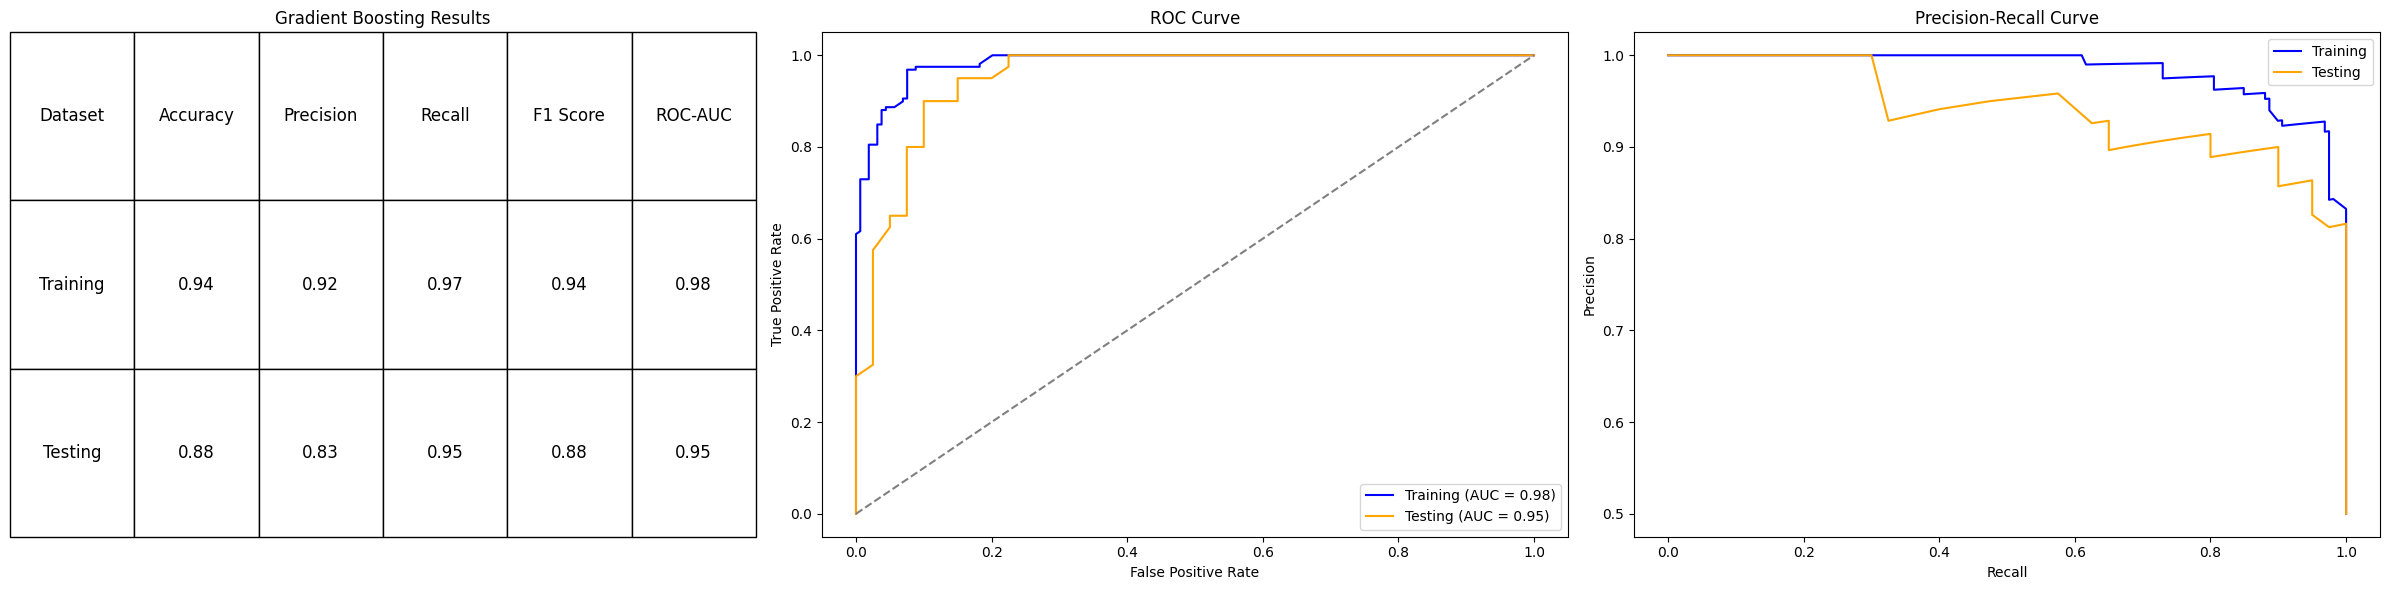

In [51]:

# Gradient Boosting Model with Hyperparameter Tuning
param_grid_gbm = {'n_estimators': [20,30], 'learning_rate': [ 0.1],'max_depth': [2,3],'min_samples_split': [2],'min_samples_split': [3],
    'min_samples_leaf': [1, 2]}
grid_gbm = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gbm, cv=5, scoring='accuracy')
grid_gbm.fit(X_train_smote_scaled, y_train_smote)

best_gbm = grid_gbm.best_estimator_

# Predictions on the training set
y_pred_gbm_train = best_gbm.predict(X_train_smote_scaled)
y_prob_gbm_train = best_gbm.predict_proba(X_train_smote_scaled)[:, 1]

# Predictions on the testing set
y_pred_gbm_test = best_gbm.predict(X_test_smote_scaled)
y_prob_gbm_test = best_gbm.predict_proba(X_test_smote_scaled)[:, 1]

# Metrics for training set
accuracy_gbm_train = accuracy_score(y_train_smote, y_pred_gbm_train)
precision_gbm_train, recall_gbm_train, f1_gbm_train, _ = precision_recall_fscore_support(y_train_smote, y_pred_gbm_train, average='binary')
roc_auc_gbm_train = roc_auc_score(y_train_smote, y_prob_gbm_train)
fpr_gbm_train, tpr_gbm_train, _ = roc_curve(y_train_smote, y_prob_gbm_train)
precision_curve_gbm_train, recall_curve_gbm_train, _ = precision_recall_curve(y_train_smote, y_prob_gbm_train)

# Metrics for testing set
accuracy_gbm_test = accuracy_score(y_test_smote, y_pred_gbm_test)
precision_gbm_test, recall_gbm_test, f1_gbm_test, _ = precision_recall_fscore_support(y_test_smote, y_pred_gbm_test, average='binary')
roc_auc_gbm_test = roc_auc_score(y_test_smote, y_prob_gbm_test)
fpr_gbm_test, tpr_gbm_test, _ = roc_curve(y_test_smote, y_prob_gbm_test)
precision_curve_gbm_test, recall_curve_gbm_test, _ = precision_recall_curve(y_test_smote, y_prob_gbm_test)

# Create a DataFrame for results
results_gbm_df = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [f"{accuracy_gbm_train:.2f}", f"{accuracy_gbm_test:.2f}"],
    'Precision': [f"{precision_gbm_train:.2f}", f"{precision_gbm_test:.2f}"],
    'Recall': [f"{recall_gbm_train:.2f}", f"{recall_gbm_test:.2f}"],
    'F1 Score': [f"{f1_gbm_train:.2f}", f"{f1_gbm_test:.2f}"],
    'ROC-AUC': [f"{roc_auc_gbm_train:.2f}", f"{roc_auc_gbm_test:.2f}"]
})

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot the table
axes[0].axis('tight')
axes[0].axis('off')
table_gbm = axes[0].table(cellText=results_gbm_df.values, colLabels=results_gbm_df.columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table_gbm.auto_set_font_size(False)
table_gbm.set_fontsize(12)
table_gbm.scale(0.6, 1.2)  # Adjusting the scale to make the table narrower
axes[0].set_title('Gradient Boosting Results')

# Plot ROC curve for testing set
axes[1].plot(fpr_gbm_train, tpr_gbm_train, color='blue', label=f'Training (AUC = {roc_auc_gbm_train:.2f})')
axes[1].plot(fpr_gbm_test, tpr_gbm_test, color='orange', label=f'Testing (AUC = {roc_auc_gbm_test:.2f})')
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='best')

# Plot Precision-Recall curve for testing set
axes[2].plot(recall_curve_gbm_train, precision_curve_gbm_train, color='blue', label=f'Training')
axes[2].plot(recall_curve_gbm_test, precision_curve_gbm_test, color='orange', label=f'Testing')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve')
axes[2].legend(loc='best')

plt.tight_layout()
plt.show()
